In [ ]:
!pip install --upgrade yfinance==0.1.74

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import numpy as np
import math
from collections import Counter
from scipy.stats import bartlett
import statistics as st
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns 
import networkx as nx
import seaborn as sns
from scipy.stats import shapiro, normaltest, anderson, kstest, t, norm

In [ ]:
# проверка версии пакета yfinance
!pip show yfinance

Name: yfinance
Version: 0.1.74
Summary: Download market data from Yahoo! Finance API
Home-page: https://github.com/ranaroussi/yfinance
Author: Ran Aroussi
Author-email: ran@aroussi.com
License: Apache
Location: /usr/local/lib/python3.7/dist-packages
Requires: requests, lxml, multitasking, pandas, numpy
Required-by: 


In [ ]:
tickers = ['2CRSI.PA', 'AB.PA', 'ABCA.PA', 'ABEO.PA', 'ABNX.PA', 'ABVX.PA', 'ABLD.PA', 'ABO.PA', 'ACAN.PA', 'AC.PA', 'AAC.PA', 'AACW.PA', 'EOS.PA', 'ATI.PA', 'ALDV.PA', 'ADOC.PA', 'ADP.PA', 'ADUX.PA', 'ADVI.PA', 'AELIS.PA', 'AKOM.PA', 'AFME.PA', 'AF.PA', 'AI.PA', 'AIR.PA', 'AKW.PA', 'AAA.PA', 'ABIO.PA', 'ALD.PA', 'CDA.PA', 'ALO.PA', 'LTA.PA', 'ALTA.PA', 'AREIT.PA', 'ATE.PA', 'ALTUR.PA', 'AMPLI.PA', 'AMUN.PA', 'ANTIN.PA', 'APAM.PA', 'APM.PA', 'ARAMI.PA', 'MT.PA', 'ARG.PA', 'AKE.PA', 'ARTE.PA', 'PRC.PA', 'ARTO.PA', 'ASY.PA', 'ATEME.PA', 'ATLD.PA', 'ATO.PA', 'AUB.PA', 'AUGR.PA', 'AURE.PA', 'AURS.PA', 'AVT.PA', 'CS.PA', 'AXW.PA', 'BAIN.PA', 'BALYO.PA', 'BUI.PA', 'BASS.PA', 'BLC.PA', 'BLV.PA', 'BEN.PA', 'BB.PA', 'BIG.PA', 'BIM.PA', 'BLEE.PA', 'BNP.PA', 'BOI.PA', 'BOL.PA', 'BON.PA', 'BOTHE.PA', 'BSD.PA', 'EN.PA', 'BVI.PA', 'BUR.PA', 'CAT31.PA', 'CAFO.PA', 'CBDG.PA', 'CAP.PA', 'CARM.PA', 'CARP.PA', 'CA.PA', 'CO.PA', 'CAS.PA', 'CATG.PA', 'CTRG.PA', 'CATR.PA', 'CBOT.PA', 'CGM.PA', 'CYAD.PA', 'CFI.PA', 'CGG.PA', 'CGGBT.PA', 'CRI.PA', 'CHSR.PA', 'CDI.PA', 'CLA.PA', 'COM.PA', 'CNV.PA', 'COFA.PA', 'COH.PA', 'RE.PA', 'ODET.PA', 'COUR.PA', 'COV.PA', 'COVH.PA', 'CRAP.PA', 'CRAV.PA', 'CRBP2.PA', 'CIV.PA', 'CRLA.PA', 'CRLO.PA', 'CMO.PA', 'CNF.PA', 'CCN.PA', 'CAF.PA', 'CRSU.PA', 'CRTO.PA', 'ACA.PA', 'CROS.PA', 'SX.PA', 'BN.PA', 'AM.PA', 'DSY.PA', 'DBV.PA', 'DEE.PA', 'DEEW.PA', 'DEEZR.PA', 'DEEZW.PA', 'DKUPL.PA', 'DBG.PA', 'DGE.PA', 'DMSIM.PA', 'DPAM.PA', 'EDEN.PA', 'EDF.PA', 'FGR.PA', 'EKI.PA', 'ELEC.PA', 'EEM.PA', 'ELIOR.PA', 'ELIS.PA', 'ENGI.PA', 'EQS.PA', 'ERA.PA', 'ERYP.PA', 'ESI.PA', 'ESP.PA', 'EL.PA', 'ES.PA', 'EFI.PA', 'RF.PA', 'KINGS.PA', 'KINGW.PA', 'EUR.PA', 'EAPI.PA', 'ERF.PA', 'ENX.PA', 'ETL.PA', 'EGR.PA', 'EXN.PA', 'EXE.PA', 'EXPL.PA', 'EO.PA', 'FAYE.PA', 'FDJ.PA', 'FCMC.PA', 'FALG.PA', 'SACI.PA', 'ORIA.PA', 'FGA.PA', 'BERR.PA', 'EBPF.PA', 'FOAF.PA', 'FINM.PA', 'FNTS.PA', 'FIPP.PA', 'FNAC.PA', 'LEBL.PA', 'EURS.PA', 'INEA.PA', 'FLY.PA', 'SPEL.PA', 'FORE.PA', 'FORSE.PA', 'FDE.PA', 'FREY.PA', 'GALIM.PA', 'GAM.PA', 'GEA.PA', 'GFC.PA', 'GNE.PA', 'GNRO.PA', 'GNFT.PA', 'GV.PA', 'SIGHT.PA', 'GET.PA', 'GLO.PA', 'GPE.PA', 'GRVO.PA', 'CEN.PA', 'FLO.PA', 'GOE.PA', 'IRD.PA', 'GJAJ.PA', 'PARP.PA', 'SFPI.PA', 'GTBP.PA', 'GTT.PA', 'GBT.PA', 'GUI.PA', 'PIG.PA', 'HDF.PA', 'RMS.PA', 'HEXA.PA', 'HCO.PA', 'HOLN.PA', 'HDP.PA', 'ICAD.PA', 'IDL.PA', 'IDIP.PA', 'NK.PA', 'IMDA.PA', 'INFE.PA', 'INF.PA', 'IPH.PA', 'ITP.PA', 'ITXT.PA', 'IVA.PA', 'IPN.PA', 'IPS.PA', 'ITE.PA', 'JBOG.PA', 'JCQ.PA', 'DEC.PA', 'KOF.PA', 'KER.PA', 'LI.PA', 'KORI.PA', 'OR.PA', 'LACR.PA', 'MMB.PA', 'LAT.PA', 'LPE.PA', 'LOUP.PA', 'LSS.PA', 'LR.PA', 'LHYFE.PA', 'LIN.PA', 'FII.PA', 'LNA.PA', 'LBIRD.PA', 'MC.PA', 'LYS.PA', 'MRM.PA', 'MAAT.PA', 'MDM.PA', 'MALT.PA', 'MTU.PA', 'MAN.PA', 'IAM.PA', 'MKEA.PA', 'MAU.PA', 'MBWS.PA', 'MBWSZ.PA', 'MCPHY.PA', 'EDI.PA', 'MEDCL.PA', 'MEMS.PA', 'MERY.PA', 'MRK.PA', 'MRN.PA', 'METEX.PA', 'MMT.PA', 'ML.PA', 'MONC.PA', 'MONT.PA', 'MHM.PA', 'NACON.PA', 'NANO.PA', 'NAVYA.PA', 'NEOEN.PA', 'NRO.PA', 'NEX.PA', 'NXI.PA', 'NEXTS.PA', 'NHOA.PA', 'COX.PA', 'NOKIA.PA', 'NR21.PA', 'NRG.PA', 'SBT.PA', 'OLG.PA', 'ORA.PA', 'ORAP.PA', 'ORAPB.PA', 'OREGE.PA', 'ORP.PA', 'OSE.PA', 'OVH.PA', 'PID.PA', 'PAR.PA', 'PARRO.PA', 'PABSA.PA', 'PABSB.PA', 'PSAT.PA', 'PAT.PA', 'PCA.PA', 'RI.PA', 'PERR.PA', 'PEUG.PA', 'VACBS.PA', 'VACBT.PA', 'VAC.PA', 'PVL.PA', 'POM.PA', 'POXEL.PA', 'PREC.PA', 'PROAC.PA', 'PWG.PA', 'PUB.PA', 'QDT.PA', 'RAL.PA', 'GDS.PA', 'RX.PA', 'RCO.PA', 'RNO.PA', 'RXL.PA', 'RBT.PA', 'CBR.PA', 'CBE.PA', 'RBO.PA', 'ROTH.PA', 'RUI.PA', 'SK.PA', 'SAF.PA', 'SGO.PA', 'SABE.PA', 'SAMS.PA', 'SAN.PA', 'DIM.PA', 'SAVE.PA', 'CBSM.PA', 'SLB.PA', 'SU.PA', 'SCR.PA', 'SCHP.PA', 'SGRO.PA', 'SLCO.PA', 'SELER.PA', 'SEFER.PA', 'SESG.PA', 'SESL.PA', 'SRP.PA', 'SII.PA', 'SMCP.PA', 'SMTPC.PA', 'SFCA.PA', 'GLE.PA', 'SW.PA', 'SEC.PA', 'SOG.PA', 'SOI.PA', 'LOCAL.PA', 'S30.PA', 'SOLB.PA', 'SO.PA', 'SOP.PA', 'SPIE.PA', 'SQI.PA', 'DPT.PA', 'STF.PA', 'STLA.PA', 'STM.PA', 'SWP.PA', 'SDG.PA', 'TKTT.PA', 'TAYN.PA', 'TCHCS.PA', 'TE.PA', 'TEP.PA', 'TVRB.PA', 'TRACT.PA', 'TERBS.PA', 'TFI.PA', 'TFF.PA', 'HO.PA', 'THEP.PA', 'TKO.PA', 'TIPI.PA', 'TITC.PA', 'TTE.PA', 'EC.PA', 'TOUP.PA', 'EIFF.PA', 'TNG.PA', 'TRAN.PA', 'TRANW.PA', 'TRI.PA', 'UBI.PA', 'URW.PA', 'UNBL.PA', 'UFF.PA', 'FPG.PA', 'FR.PA', 'VK.PA', 'VKBS.PA', 'VLA.PA', 'VANTI.PA', 'VANBS.PA', 'VIE.PA', 'VRLA.PA', 'VMX.PA', 'VETO.PA', 'VCT.PA', 'VIL.PA', 'RIN.PA', 'DG.PA', 'VIRP.PA', 'VTR.PA', 'VIV.PA', 'VLTSA.PA', 'VRAP.PA', 'WAGA.PA', 'WAVE.PA', 'MF.PA', 'WLN.PA', 'XFAB.PA', 'XIL.PA', 'CV.PA']

##**1. Сбор данных по индексу рынка CAC40**

In [ ]:
ticker = yf.Ticker('^FCHI')
if (ticker.info['regularMarketPrice'] != None):
  print("ok")

ok


In [ ]:
data_index = yf.download('^FCHI', start="2016-12-30", end="2017-12-31", interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data_index

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-30,4837.680176,4864.290039,4825.140137,4862.310059,4862.310059,53055000
2017-01-02,4845.959961,4896.009766,4843.930176,4882.379883,4882.379883,34310400
2017-01-03,4904.770020,4929.600098,4896.109863,4899.330078,4899.330078,82609500
2017-01-04,4912.950195,4913.939941,4879.229980,4899.399902,4899.399902,77276800
2017-01-05,4881.720215,4905.839844,4874.790039,4900.640137,4900.640137,88092000
...,...,...,...,...,...,...
2017-12-21,5332.390137,5389.799805,5323.540039,5385.970215,5385.970215,70387200
2017-12-22,5371.000000,5385.959961,5355.439941,5364.720215,5364.720215,46753800
2017-12-27,5359.819824,5388.140137,5352.529785,5368.839844,5368.839844,41098800


##**Сбор данных по дневным ценам активов и дневным объемам продаж**

In [ ]:
data = yf.download(tickers, start="2017-01-01", end="2017-12-31", interval = "1d")

[*********************100%***********************]  434 of 434 completed

60 Failed downloads:
- VACBT.PA: No data found, symbol may be delisted
- NR21.PA: Data doesn't exist for startDate = 1483228800, endDate = 1514678400
- AACW.PA: No data found for this date range, symbol may be delisted
- AKOM.PA: Data doesn't exist for startDate = 1483228800, endDate = 1514678400
- MEDCL.PA: Data doesn't exist for startDate = 1483228800, endDate = 1514678400
- VKBS.PA: No data found, symbol may be delisted
- BLV.PA: Data doesn't exist for startDate = 1483228800, endDate = 1514678400
- NACON.PA: Data doesn't exist for startDate = 1483228800, endDate = 1514678400
- VANBS.PA: No data found for this date range, symbol may be delisted
- DEEZW.PA: Data doesn't exist for startDate = 1483228800, endDate = 1514678400
- ANTIN.PA: Data doesn't exist for startDate = 1483228800, endDate = 1514678400
- KINGW.PA: No data found for this date range, symbol may be delisted
- TE.PA: Data doesn't exist for startDate

**Удаляем активы, для которых больше 10% наблюдений заполнены NaN значениями**

In [ ]:
data_close = data["Close"]
data_close_index = data_index["Close"]
data_volume = data["Volume"] # массив объёма продаж


counters = {}
for col in data_close.columns:
  counters[col] = 0
  for row in data_close.index:
    if np.isnan(data_close[col][row]):
      counters[col] += 1
to_drop = []
for col in counters:
  if counters[col] > 20:
    to_drop.append(col)

In [ ]:
data_close.drop(to_drop, axis = 1, inplace=True) 
data_volume.drop(to_drop, axis = 1, inplace=True) 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_volume

,AAA.PA,AB.PA,ABCA.PA,ABEO.PA,ABIO.PA,ABLD.PA,ABNX.PA,ABVX.PA,AC.PA,ACA.PA,...,VIV.PA,VK.PA,VLA.PA,VLTSA.PA,VMX.PA,VRAP.PA,VTR.PA,WAVE.PA,WLN.PA,XIL.PA
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,0.0,312723.0,40079.0,2655.0,46188.0,0.0,51258.0,6952.0,353327.0,1838609.0,...,1384849.0,96494.0,173183.0,30540.0,478552.0,1105.0,148.0,8012.0,25133.0,9468.0
2017-01-03,200.0,285923.0,49714.0,2437.0,46230.0,0.0,76642.0,28747.0,1398057.0,5918766.0,...,2620262.0,237416.0,250520.0,17340.0,306594.0,1959.0,1.0,20040.0,54372.0,25162.0
2017-01-04,0.0,835772.0,49828.0,1084.0,67641.0,0.0,65319.0,10974.0,1690703.0,5212254.0,...,2366946.0,184569.0,246255.0,12400.0,321966.0,235.0,102.0,4420.0,60804.0,89990.0
2017-01-05,0.0,372905.0,44135.0,1883.0,20883.0,720.0,40412.0,72091.0,1241250.0,7109648.0,...,2192128.0,102693.0,166704.0,18031.0,49023.0,195.0,206.0,8780.0,27432.0,81173.0
2017-01-06,1000.0,452543.0,154135.0,738.0,20099.0,0.0,33024.0,34870.0,1037050.0,4699165.0,...,1944176.0,116721.0,90810.0,43231.0,206586.0,711.0,242.0,7848.0,61357.0,73111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,0.0,92707.0,24058.0,1759.0,48876.0,0.0,68538.0,21565.0,711569.0,4167476.0,...,2521027.0,282892.0,87303.0,18094.0,60589.0,1562.0,51.0,11884.0,46677.0,7958.0
2017-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-27,100.0,115361.0,83885.0,813.0,36003.0,0.0,31374.0,25295.0,411139.0,2842985.0,...,1701327.0,221608.0,100313.0,11940.0,48308.0,4109.0,458.0,4924.0,54415.0,23559.0


**Удаляем данные о днях, для которых более 300 активов заполнены NaN значениями**

In [ ]:
# удаляем строки (дни)
rows_to_drop = {}
for row in data_close.index:
    rows_to_drop[row] = 0
    for col in data_close.columns:
        if pd.isna(data_close[col][row]):
            rows_to_drop[row] += 1
for row in rows_to_drop:
    if rows_to_drop[row] > 300: #удаляем строку, если в этот день не торговались хотя бы 300 акций
        data_close.drop(row, axis = 0, inplace = True)
        data_volume.drop(row, axis = 0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Удаляем данные об активах, которые не торговались более 230 дней из 255**

In [ ]:
counters_zero_volume = {}
for col in data_close.columns:
  counters_zero_volume[col] = 0
  for row in data_close.index:
    if data_volume[col][row]==0:
      counters_zero_volume[col] += 1
to_drop_zero_volume = []
for col in counters_zero_volume:
  if counters_zero_volume[col] > 230:
    to_drop_zero_volume.append(col)

In [ ]:
to_drop_zero_volume

['ABLD.PA',
 'BLEE.PA',
 'CARP.PA',
 'CBR.PA',
 'CHSR.PA',
 'EBPF.PA',
 'FOAF.PA',
 'FORE.PA',
 'MT.PA',
 'SLCO.PA']

In [ ]:
data_close.drop(to_drop_zero_volume, axis = 1, inplace=True) 
data_volume.drop(to_drop_zero_volume, axis = 1, inplace=True) 

In [ ]:
# в каких столбцах остались NaN значения
counters_nan = []
for col in data_close.columns:
  if data_close[col].isnull().sum() > 0:
    print(col)
    counters_nan.append(col)

In [ ]:
data_close.drop(counters_nan, axis = 1, inplace=True) 
data_volume.drop(counters_nan, axis = 1, inplace=True) 

##**2. Преобразование данных по ценам в данные по доходностям**

In [ ]:
profitability = np.log(data_close.pct_change()+1)

for col in profitability.columns: # заполнение NaN знаений средним по акции
    profitability[col].fillna(profitability[col].mean(), inplace=True)

In [ ]:
profitability

,AAA.PA,AB.PA,ABCA.PA,ABEO.PA,ABIO.PA,ABNX.PA,ABVX.PA,AC.PA,ACA.PA,ACAN.PA,...,VIV.PA,VK.PA,VLA.PA,VLTSA.PA,VMX.PA,VRAP.PA,VTR.PA,WAVE.PA,WLN.PA,XIL.PA
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,0.007183,-0.002263,-0.000527,0.001758,0.000986,-0.005924,0.001239,0.000731,0.000596,0.001102,...,0.000844,-0.001176,-0.000531,0.000518,0.000514,0.000162,0.000023,0.001139,0.001646,0.005304
2017-01-03,0.441833,0.050010,0.000000,-0.000741,-0.009816,0.006952,-0.004773,0.024068,0.031946,0.000000,...,0.000829,0.019262,-0.006329,0.001124,-0.027507,0.010977,0.000000,-0.014401,-0.000187,0.120200
2017-01-04,0.000000,0.075391,0.002782,-0.012307,-0.006184,-0.018649,0.011102,0.022433,0.004482,-0.015504,...,0.005507,-0.008127,-0.028988,0.002245,-0.020121,-0.001311,-0.006653,0.002195,-0.008064,0.124491
2017-01-05,0.000000,-0.030214,-0.012579,-0.006399,0.003715,-0.009456,0.044726,0.015251,0.002436,0.015504,...,0.001646,0.000728,0.022618,0.006704,0.012121,-0.001751,-0.007774,-0.002745,-0.005097,0.077535
2017-01-06,-0.014389,-0.058097,-0.022761,-0.004921,-0.008067,-0.002378,0.010503,-0.002768,0.000405,0.000000,...,0.004922,0.028987,-0.003200,0.003335,-0.028515,-0.005710,-0.003505,-0.007615,-0.024328,-0.112239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,0.000000,0.001213,0.001594,0.006079,-0.005000,0.031749,0.036453,0.004201,-0.003893,0.024098,...,0.010951,0.029202,-0.007299,-0.061311,0.007194,0.000420,0.001333,0.002436,0.002368,-0.004866
2017-12-22,0.000000,-0.015883,-0.003190,-0.000242,0.020343,-0.042560,-0.024548,0.003587,-0.007117,0.023531,...,-0.008312,0.045553,0.010929,-0.004876,-0.003591,0.000000,0.001331,0.006548,-0.002368,-0.007098
2017-12-27,0.000000,0.004914,-0.001599,0.000242,0.018974,0.016173,-0.007126,0.004168,-0.007168,0.000000,...,-0.000659,0.037657,-0.014599,-0.004900,0.031861,-0.007159,0.007421,-0.015346,0.015725,-0.026887


In [ ]:
std_arr=[]
mean_arr=[]
for col in profitability.columns:
  std_arr.append(np.std(profitability[col].values))
  mean_arr.append(np.mean(profitability[col].values))

##**Карта активов, плоскость ($\sigma$,E)**

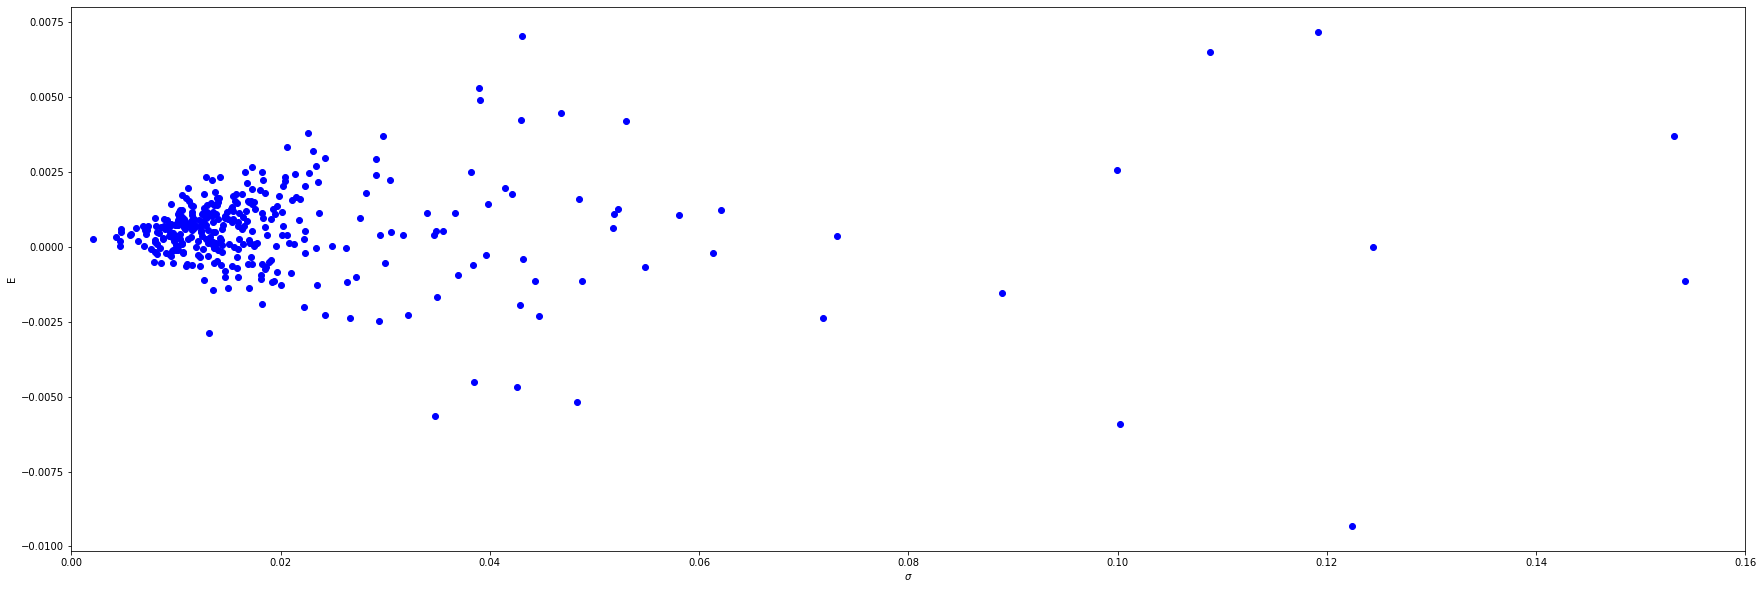

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(std_arr, mean_arr, 'bo')
plt.ylabel('E')
plt.xlabel('$\sigma$')
plt.xlim([0, 0.16])
plt.show()


In [ ]:
index_of_ticker_with_smallest_variance = std_arr.index(min(std_arr))

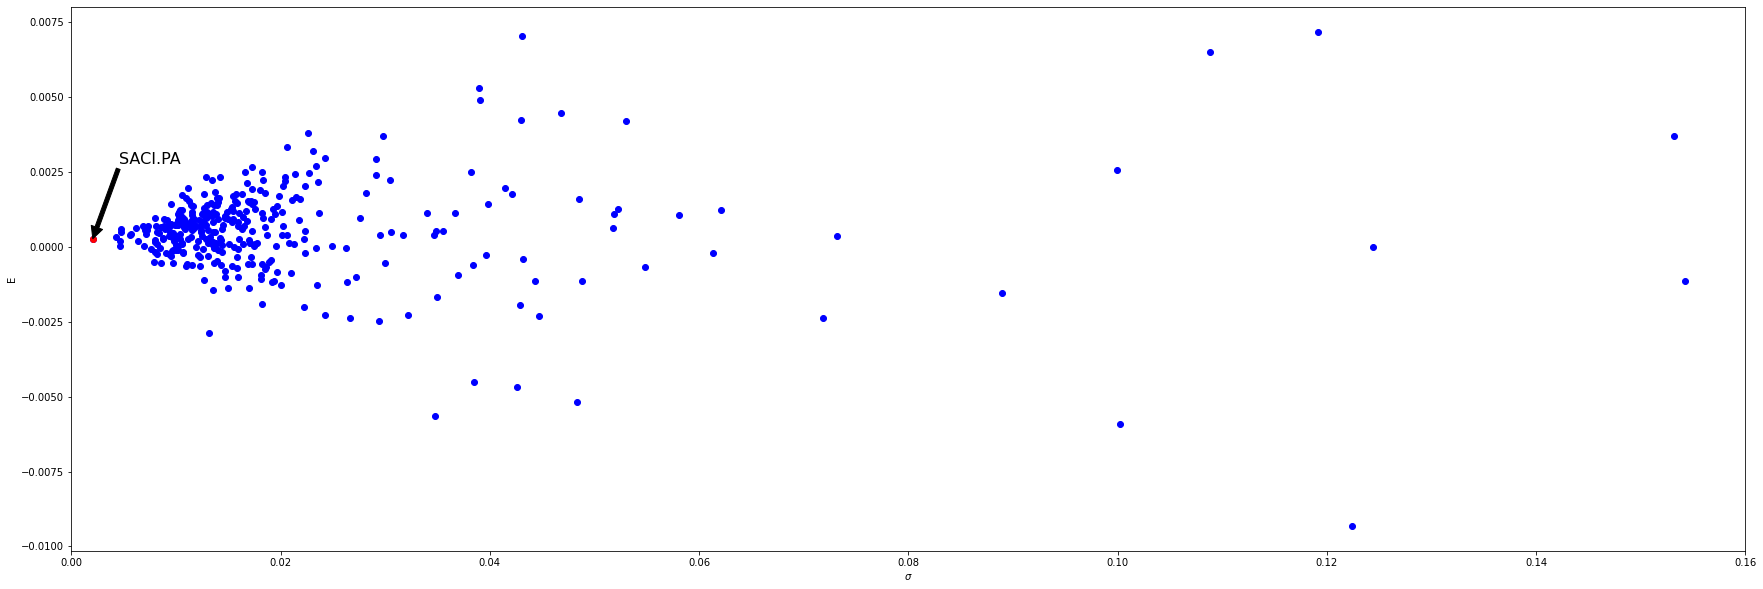

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(std_arr, mean_arr, 'bo')
plt.plot(std_arr[index_of_ticker_with_smallest_variance], mean_arr[index_of_ticker_with_smallest_variance], 'ro')
plt.annotate('SACI.PA', xy = (std_arr[index_of_ticker_with_smallest_variance], mean_arr[index_of_ticker_with_smallest_variance]), 
             fontsize = 16, xytext = (std_arr[index_of_ticker_with_smallest_variance]+0.0025, mean_arr[index_of_ticker_with_smallest_variance]+0.0025), 
             arrowprops = dict(facecolor = 'black'),
             color = 'black')
plt.ylabel('E')
plt.xlabel('$\sigma$')
plt.xlim([0, 0.16])
plt.show()

**Fiducial Office Solutions (SACI.PA) distributes office supplies and offers printing services to businesses.**

##**3. Портфель с равными долями активов**

In [ ]:
num_of_tickers = len(profitability.columns)
portf_equal_shares = dict.fromkeys(profitability.index, 0)
for date in profitability.index:
  for col in profitability.columns:
    portf_equal_shares[date] += (1/num_of_tickers)*(profitability[col][date])

In [ ]:
portf_std = np.std(list(portf_equal_shares.values()))
portf_mean = np.mean(list(portf_equal_shares.values()))

**$E$ и $\sigma$ сбалансированного портфеля**

In [ ]:
print("E=" + str(portf_mean) + ' \u03C3=' + str(portf_std))

E=0.0005564189528831292 σ=0.0040428975779202595


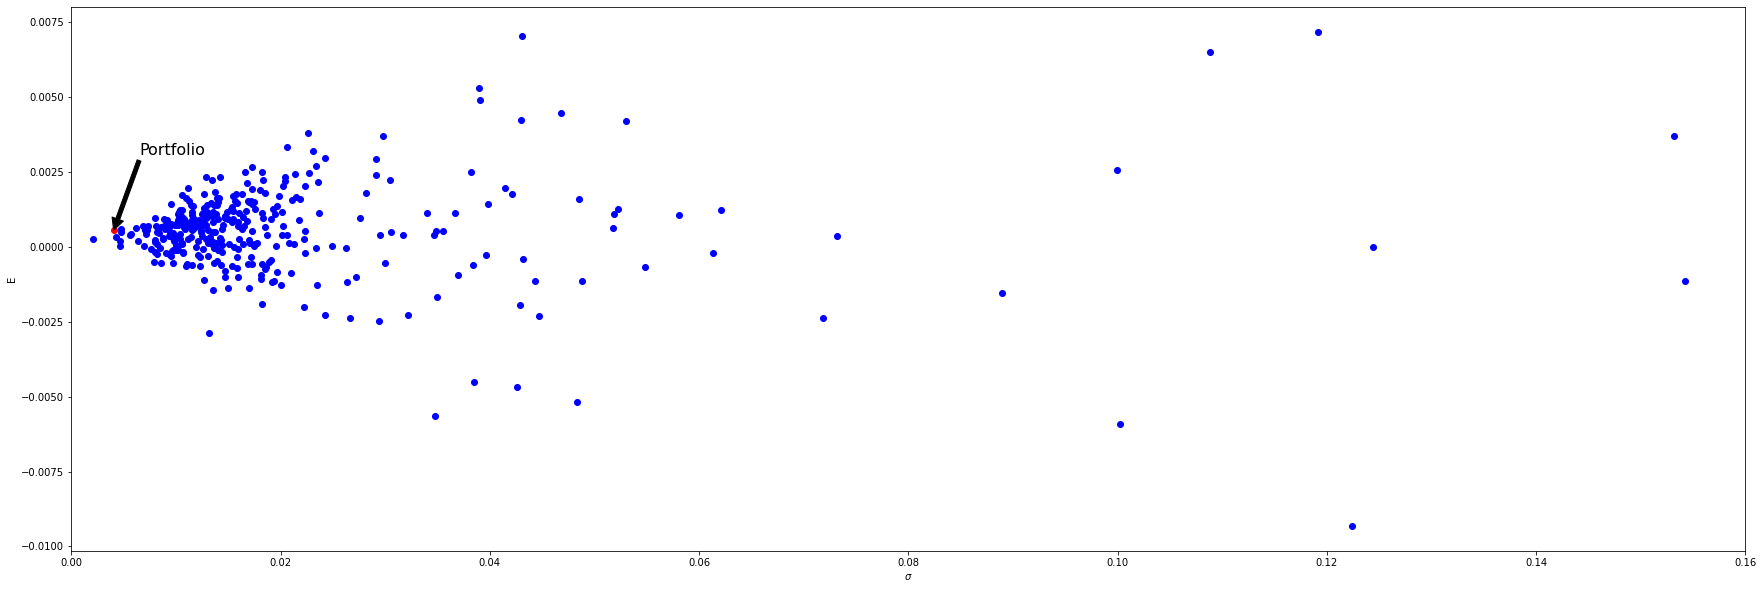

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(std_arr, mean_arr, 'bo')
plt.plot(portf_std, portf_mean, 'ro')
plt.annotate('Portfolio', xy = (portf_std, portf_mean), 
             fontsize = 16, xytext = (portf_std+0.0025, portf_mean+0.0025), 
             arrowprops = dict(facecolor = 'black'),
             color = 'black')
plt.ylabel('E')
plt.xlabel('$\sigma$')
plt.xlim([0, 0.16])
plt.show()

**По плоскости ($\sigma$,E) заметно, что сбалансированный портфель имеет сравнительно небольшой риск и среднюю ожидаемую доходность относительно рассматриваемых активов.**

##**4. Индекс рынка**

**CAC40 комапании: Air Liquide, Airbus, Alstom, ArcelorMittal, Axa, BNP Paribas, Bouygues, Capgemini, Carrefour, Crédit Agricole, Danone, Dassault Systèmes, Engie, EssilorLuxottica, Eurofins Scientific, Hermès, Kering, L'Oréal, Legrand,LVMH, Michelin, Orange S.A., Pernod Ricard, Publicis, Renault, Safran, Saint-Gobain, Sanofi, Schneider Electric, Société Générale, Stellantis,STMicroelectronics, Teleperformance, Thales Group, TotalEnergies, Unibail-Rodamco-Westfield, Veolia, Vinci SA, Vivendi, Worldline SA**

In [ ]:
profitability_index = np.log(data_close_index.pct_change()+1)
profitability_index.drop(data_close_index.index[0], axis = 0, inplace=True)

In [ ]:
index_std = np.std(profitability_index.values)
index_mean = np.mean(profitability_index.values)

**$E$ и $\sigma$ индекса рынка**

In [ ]:
print("E=" + str(index_mean) + ' \u03C3=' + str(index_std))

E=0.00034729487706700957 σ=0.006594244034109824


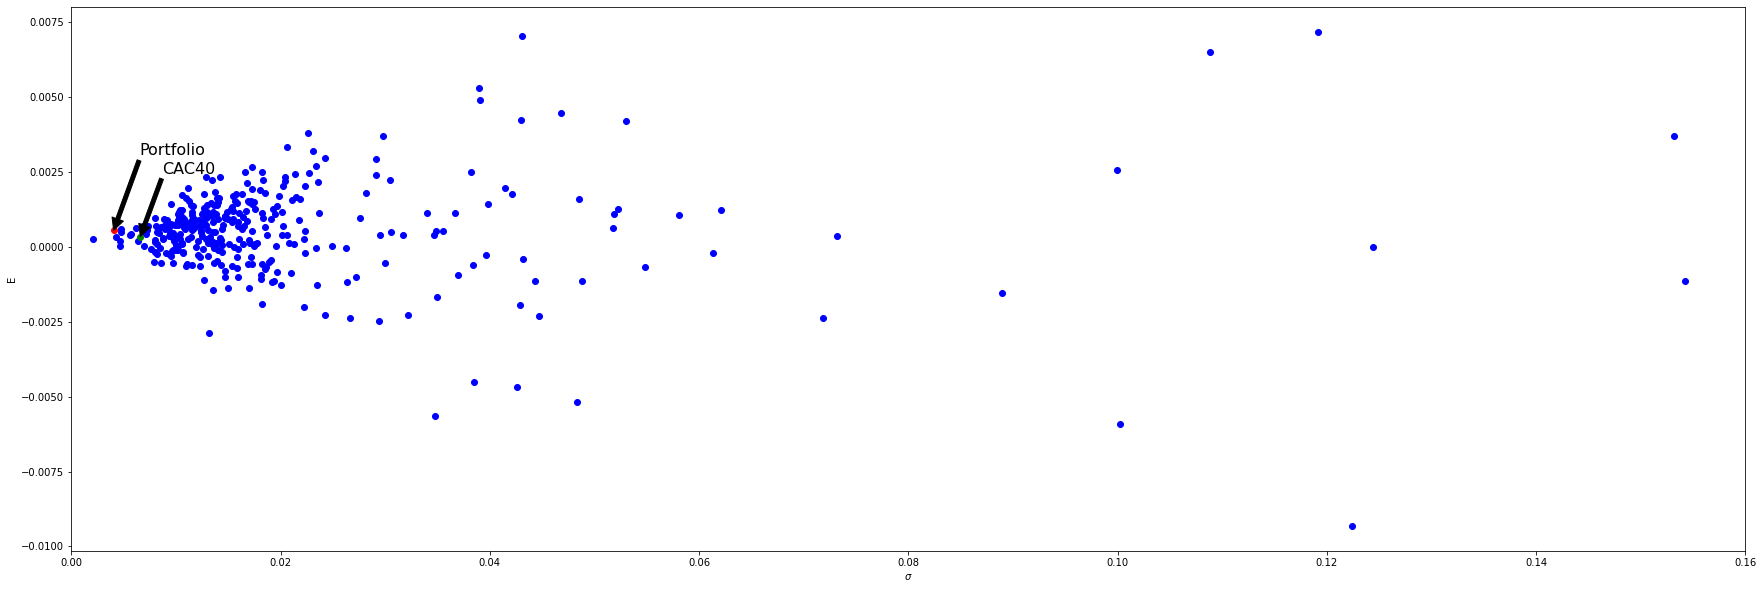

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(std_arr, mean_arr, 'bo')
plt.plot(portf_std, portf_mean, 'ro')
plt.plot(index_std, index_mean, 'go')
plt.annotate('CAC40', xy = (index_std, index_mean), 
             fontsize = 16, xytext = (index_std+0.0021, index_mean+0.0021), 
             arrowprops = dict(facecolor = 'black'),
             color = 'black')
plt.annotate('Portfolio', xy = (portf_std, portf_mean), 
             fontsize = 16, xytext = (portf_std+0.0025, portf_mean+0.0025), 
             arrowprops = dict(facecolor = 'black'),
             color = 'black')
plt.ylabel('E')
plt.xlabel('$\sigma$')
plt.xlim([0, 0.16])
plt.show()

**Ожидаемая доходность для индекса французского рынка CAC40 - положительная, при этом риск однозначно ниже среднего по активам на рынке. Положительное значение доходности указывает на положительную динамику на рынке.**

##**5. Оценка Value at Risk**

In [ ]:
profitability_=profitability

In [ ]:
prof_matrix=[]
for i in range(len(profitability.columns)):
  prof_matrix.append(sorted(profitability[profitability.columns[i]].values))

In [ ]:
minus_profitability_matrix = []
for i in range(len(prof_matrix)):
  minus_profitability_matrix.append(np.multiply(prof_matrix[i],-1))

In [ ]:
observation_number = len(minus_profitability_matrix[0])
observation_number

255

In [ ]:
gamma = 0.95
num_of_risk_observations = math.floor(observation_number*(1-gamma))
num_of_risk_observations

12

In [ ]:
var_values=[]
for i in range(len(minus_profitability_matrix)):
  counter_dict = dict(Counter(minus_profitability_matrix[i]))
  counter_dict_keys = list(counter_dict.keys())
  var_value_for_ticker = -5
  j = 0
  sum = counter_dict[counter_dict_keys[0]]
  while sum/observation_number <= 1-gamma:
    j=j+1
    sum+=counter_dict[counter_dict_keys[j]]
  var_value_for_ticker = counter_dict_keys[j]
  var_values.append(var_value_for_ticker)

##**Наиболее предпочтительный актив согласно VaR характеристике**

In [ ]:
index_of_best_ticker_by_var_value = var_values.index(min(var_values))
data_close.columns[index_of_best_ticker_by_var_value]

'CBDG.PA'

In [ ]:
index_of_best_ticker_by_var_value_not_zero = var_values.index(min(x for x in var_values if x != 0))
data_close.columns[index_of_best_ticker_by_var_value_not_zero]

'CROS.PA'

**Для актива CBDG.PA (transportation and logistics services) характеристика VaR - наименьшая.**

In [ ]:
var_values[index_of_best_ticker_by_var_value]

-0.0

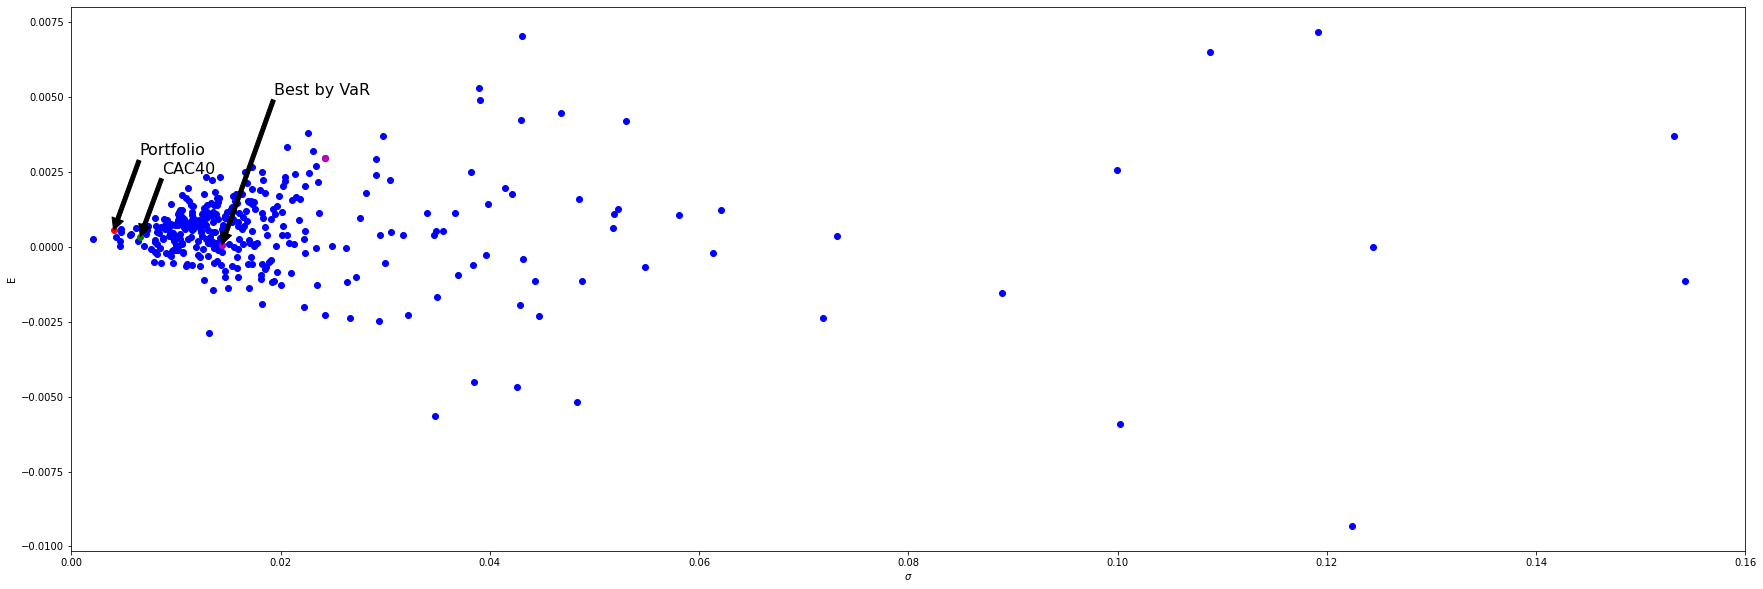

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(std_arr, mean_arr, 'bo')
plt.plot(portf_std, portf_mean, 'ro')
plt.plot(index_std, index_mean, 'go')
plt.plot(std_arr[68], mean_arr[68], 'mo')
plt.plot(std_arr[103], mean_arr[103], 'mo')
plt.annotate('Best by VaR', xy = (std_arr[68], mean_arr[68]), 
             fontsize = 16, xytext = (std_arr[68]+0.005, mean_arr[68]+0.005), 
             arrowprops = dict(facecolor = 'black'),
             color = 'black')
plt.annotate('CAC40', xy = (index_std, index_mean), 
             fontsize = 16, xytext = (index_std+0.0021, index_mean+0.0021), 
             arrowprops = dict(facecolor = 'black'),
             color = 'black')
plt.annotate('Portfolio', xy = (portf_std, portf_mean), 
             fontsize = 16, xytext = (portf_std+0.0025, portf_mean+0.0025), 
             arrowprops = dict(facecolor = 'black'),
             color = 'black')
plt.ylabel('E')
plt.xlabel('$\sigma$')
plt.xlim([0, 0.16])
plt.show()

**Лучший по VaR актив имеет больший риск чем большинство активов на рынке**

##**VaR для портфеля с равными долями**

In [ ]:
minus_profitability_portf = np.multiply(sorted(list(portf_equal_shares.values())),-1)

In [ ]:
var_value_portf = -5
counter_dict = dict(Counter(minus_profitability_portf))
counter_dict_keys = list(counter_dict.keys())
j = 0
sum = counter_dict[counter_dict_keys[0]]
while sum/observation_number <= 1-gamma:
  j=j+1
  sum+=counter_dict[counter_dict_keys[j]]
var_value_portf = counter_dict_keys[j]

**Значение VaR для портфеля с равными долями:**

In [ ]:
var_value_portf

0.006280994512224878

##**Var для индекса рынка CAC40**

In [ ]:
minus_profitability_index = np.multiply(sorted(list(profitability_index.values)),-1)

In [ ]:
var_value_index = -5
counter_dict = dict(Counter(minus_profitability_index))
counter_dict_keys = list(counter_dict.keys())
j = 0
sum = counter_dict[counter_dict_keys[0]]
while sum/observation_number <= 1-gamma:
  j=j+1
  sum+=counter_dict[counter_dict_keys[j]]
var_value_index = counter_dict_keys[j]

**Значение VaR для индекса рынка:**

In [ ]:
var_value_index

0.009858952922992971

**По VaR характеристике сбалансированный портфель лучше индекса рынка (0.0063; 0.0099)**

##**6. Выберите несколько интересных (значимых)  активов рынка.   Можно ли считать наблюдаемые доходности (объемы продаж) конкретного актива повторной выборкой из некоторого распределения (белый шум)?**

In [ ]:
tickers_list = list(profitability.columns)
sanofi_index = tickers_list.index('SAN.PA')
societe_generale_index = tickers_list.index('GLE.PA')
nokia_index = tickers_list.index('NOKIA.PA')
renault_index = tickers_list.index('RNO.PA')
esso_index = tickers_list.index('ES.PA')
air_france_klm_index = tickers_list.index('AF.PA')
danone_index = tickers_list.index('BN.PA')
airbus_index = tickers_list.index('AIR.PA')
michelin_index = tickers_list.index('ML.PA')
carrefour_index = tickers_list.index('CA.PA')
alstom_index = tickers_list.index('ALO.PA')
well_known_names = ['Sanofi(CAC40)', 'Societe Generale(CAC40)', 'Nokia', 'Renault(CAC40)', 'Esso', 'Air France - KLM', 'Danone(CAC40)', 'Airbus(CAC40)', 'Michelin(CAC40)', 'Carrefour(CAC40)', 'Alstom(CAC40)']
well_known_indexes = [sanofi_index, societe_generale_index, nokia_index, renault_index, esso_index, air_france_klm_index, danone_index, airbus_index, michelin_index, carrefour_index, alstom_index]
well_known_indexes

[291, 166, 242, 281, 135, 14, 50, 16, 229, 59, 20]

In [ ]:
profitability_for_well_known_tickers = [list(profitability[profitability.columns[i]].values) for i in well_known_indexes]
volume_for_well_known_tickers = [list(data_volume[data_volume.columns[i]].values) for i in well_known_indexes]

#**Доходности**

**Метод инверсий**

**Гипотеза о случайности не отвергается, если значение нормализованной статистики $T_n$ не превышает критической границы для заданного уровня $\alpha$**

In [ ]:
def count_inversions(arr):
    inv_num = 0
    for i in range(len(arr)-1):
        for j in arr[i+1:]:
            if arr[i] > j:
                inv_num += 1
    return inv_num

In [ ]:
j=0
alpha = 0.05
print('Критическая граница при уровне alpha=0.05:', stats.norm.ppf(1 - alpha/2), '\n')
for ticker_profitability in profitability_for_well_known_tickers:
    Tn = count_inversions(ticker_profitability)
    n = len(ticker_profitability)
    E_Tn = (n*(n-1))/4
    D_Tn = (n*(n-1)*(2*n+5))/72
    normalized_Tn = (Tn - E_Tn)/(D_Tn**(1/2))
    if abs(normalized_Tn) >= stats.norm.ppf(1 - alpha/2):
        print(well_known_names[j], ': Гипотеза о случайности отвергается, значение статистики=',  abs(normalized_Tn))
    else:
        print(well_known_names[j], ': Гипотеза о случайности принимается, значение статистики=', abs(normalized_Tn))
    j+=1

Критическая граница при уровне alpha=0.05: 1.959963984540054 

Sanofi(CAC40) : Гипотеза о случайности отвергается, значение статистики= 2.0252677895157944
Societe Generale(CAC40) : Гипотеза о случайности принимается, значение статистики= 0.1432452734695611
Nokia : Гипотеза о случайности принимается, значение статистики= 1.856311825936312
Renault(CAC40) : Гипотеза о случайности принимается, значение статистики= 0.9762716330310086
Esso : Гипотеза о случайности принимается, значение статистики= 0.0051421380219842435
Air France - KLM : Гипотеза о случайности принимается, значение статистики= 0.5340477631403636
Danone(CAC40) : Гипотеза о случайности принимается, значение статистики= 0.14618363805355208
Airbus(CAC40) : Гипотеза о случайности принимается, значение статистики= 0.7059420913038369
Michelin(CAC40) : Гипотеза о случайности принимается, значение статистики= 0.4414892787446472
Carrefour(CAC40) : Гипотеза о случайности принимается, значение статистики= 0.14030690888557007
Alstom(CAC4

**Метод автокорреляции**

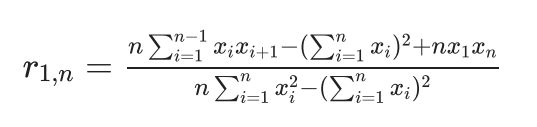

**Гипотеза о случайности не отвергается, если значение нормализованной статистики $r_{1,n}$ не превышает критической границы при заданном уровне $\alpha$.**  

In [ ]:
import math
j=0
alpha = 0.05
for ticker_profitability in profitability_for_well_known_tickers:
  n = len(ticker_profitability)
  stat_sum1 , stat_sum2 , stat_sum3 = 0, 0 , 0
  for i in range(n - 1):
    stat_sum1 += ticker_profitability[i] * ticker_profitability[i+1]
  for i in range(n):
    stat_sum2 += ticker_profitability[i]
    stat_sum3 += ticker_profitability[i] * ticker_profitability[i]
  stat_r_1n = (n * stat_sum1 - stat_sum2 + n * ticker_profitability[0] * ticker_profitability[n-1])/ (n * stat_sum3 - stat_sum2)
  e_r_1n = - 1 / (n-1)
  std_r_1n = (n * (n-3)) / ((n+1) * (n-1)**2)
  stat_r_1n_norm = (stat_r_1n - e_r_1n) / math.sqrt(std_r_1n)
  if abs(stat_r_1n_norm) >= stats.norm.ppf(1 - alpha/2):
    print(well_known_names[j], 'Гипотеза о случайности отвергается, значение статистики=', abs(stat_r_1n_norm))
  else:
    print(well_known_names[j], 'Гипотеза о случайности принимается, значение статистики=', abs(stat_r_1n_norm))
  j+=1


Sanofi(CAC40) Гипотеза о случайности принимается, значение статистики= 0.38708756578224046
Societe Generale(CAC40) Гипотеза о случайности принимается, значение статистики= 1.3013648988989528
Nokia Гипотеза о случайности принимается, значение статистики= 1.0513482896477853
Renault(CAC40) Гипотеза о случайности принимается, значение статистики= 1.1853539514042322
Esso Гипотеза о случайности принимается, значение статистики= 0.16701416395049323
Air France - KLM Гипотеза о случайности отвергается, значение статистики= 2.45452598631854
Danone(CAC40) Гипотеза о случайности принимается, значение статистики= 0.5930039590366128
Airbus(CAC40) Гипотеза о случайности принимается, значение статистики= 1.312571175145355
Michelin(CAC40) Гипотеза о случайности принимается, значение статистики= 1.0702414963324143
Carrefour(CAC40) Гипотеза о случайности принимается, значение статистики= 1.6233175081017561
Alstom(CAC40) Гипотеза о случайности принимается, значение статистики= 0.7369975563769902


##**Объемы продаж**

**Метод инверсий**

In [ ]:
j=0
alpha = 0.05
for ticker_volume in volume_for_well_known_tickers:
    Tn = count_inversions(ticker_volume)
    n = len(ticker_volume)
    E_Tn = (n*(n-1))/4
    D_Tn = (n*(n-1)*(2*n+5))/72
    normalized_Tn = (Tn - E_Tn)/(D_Tn**(1/2))
    if abs(normalized_Tn) >= stats.norm.ppf(1 - alpha/2):
        print(well_known_names[j], 'Гипотеза о случайности отвергается, значение статистики=', abs(normalized_Tn))
    else:
        print(well_known_names[j], 'Гипотеза о случайности принимается, значение статистики=', abs(normalized_Tn))
    j+=1

Sanofi(CAC40) Гипотеза о случайности отвергается, значение статистики= 2.7510438417615704
Societe Generale(CAC40) Гипотеза о случайности принимается, значение статистики= 1.6858866800648342
Nokia Гипотеза о случайности принимается, значение статистики= 1.2877382789340541
Renault(CAC40) Гипотеза о случайности принимается, значение статистики= 1.3949885862497255
Esso Гипотеза о случайности принимается, значение статистики= 1.6858866800648342
Air France - KLM Гипотеза о случайности отвергается, значение статистики= 3.2402815449960714
Danone(CAC40) Гипотеза о случайности отвергается, значение статистики= 3.607577117994946
Airbus(CAC40) Гипотеза о случайности отвергается, значение статистики= 2.1795319301753215
Michelin(CAC40) Гипотеза о случайности отвергается, значение статистики= 4.26870914939292
Carrefour(CAC40) Гипотеза о случайности отвергается, значение статистики= 4.114445008733393
Alstom(CAC40) Гипотеза о случайности отвергается, значение статистики= 4.157051295201263


**Метод автокорреляции**

In [ ]:
j=0
alpha = 0.05
for ticker_volume in volume_for_well_known_tickers:
  n = len(ticker_volume)
  stat_sum1 , stat_sum2 , stat_sum3 = 0, 0 , 0
  for i in range(n - 1):
    stat_sum1 += ticker_volume[i] * ticker_volume[i+1]
  for i in range(n):
    stat_sum2 += ticker_volume[i]
    stat_sum3 += ticker_volume[i] * ticker_volume[i]
  stat_r_1n = (n * stat_sum1 - stat_sum2 + n * ticker_volume[0] * ticker_volume[n-1])/ (n * stat_sum3 - stat_sum2)
  e_r_1n = - 1 / (n-1)
  std_r_1n = (n * (n-3)) / ((n+1) * (n-1)**2)
  stat_r_1n_norm = (stat_r_1n - e_r_1n) / math.sqrt(std_r_1n)
  if abs(stat_r_1n_norm) >= stats.norm.ppf(1 - alpha/2):
    print(well_known_names[j], 'Гипотеза о случайности отвергается, значение статистики=', abs(stat_r_1n_norm))
  else:
    print(well_known_names[j], 'Гипотеза о случайности принимаетсяб значение статистики=', abs(stat_r_1n_norm))
  j+=1


Sanofi(CAC40) Гипотеза о случайности отвергается, значение статистики= 14.509423440696406
Societe Generale(CAC40) Гипотеза о случайности отвергается, значение статистики= 14.83528810879208
Nokia Гипотеза о случайности отвергается, значение статистики= 3.7111482097267747
Renault(CAC40) Гипотеза о случайности отвергается, значение статистики= 14.10063854029484
Esso Гипотеза о случайности отвергается, значение статистики= 11.641749793642635
Air France - KLM Гипотеза о случайности отвергается, значение статистики= 13.75771276338207
Danone(CAC40) Гипотеза о случайности отвергается, значение статистики= 14.714270724228413
Airbus(CAC40) Гипотеза о случайности отвергается, значение статистики= 14.687534011708314
Michelin(CAC40) Гипотеза о случайности отвергается, значение статистики= 14.814010356211758
Carrefour(CAC40) Гипотеза о случайности отвергается, значение статистики= 12.292601152280952
Alstom(CAC40) Гипотеза о случайности отвергается, значение статистики= 13.908771722923108


**Гипотеза о случайности принимается для доходностей большинства рассмотренных активов (отвергается только для Sanofi при проверке методом инверсии и только для Air France при проверке методом автокорреляции). Для объемов продаж ситуация противоположная - гипотеза отвергается в большинстве случаев, можно предположить, что данные по объему продаж не являются случайными.**

##**7. Выберите несколько интересных (значимых)  активов рынка из разных производственных секторов.   В предположении, что наблюдаемые доходности (объемы продаж) являются повторной выборкой из некоторого распределения исследовать (выборочно) распределения доходностей и объемов продаж выбранных активов. Сделать выводы.**

**Гистограммы для логарифмической доходности**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


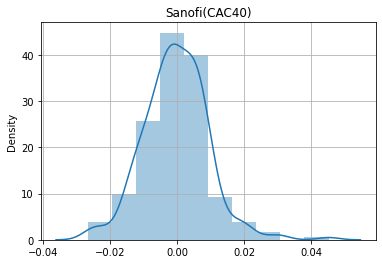

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


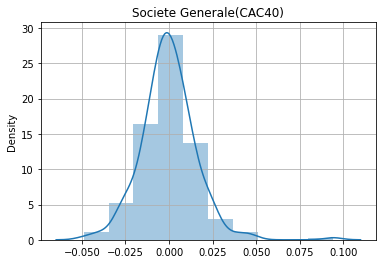

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


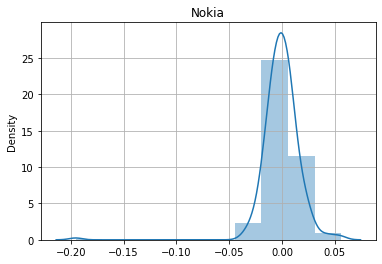

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


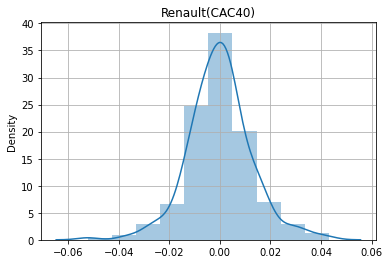

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


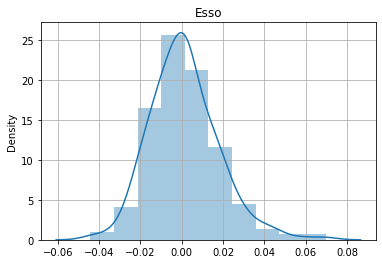

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


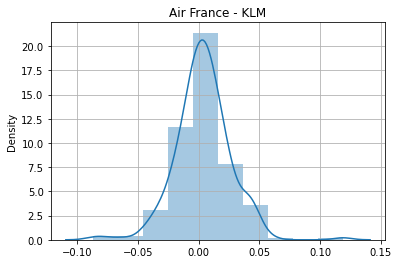

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


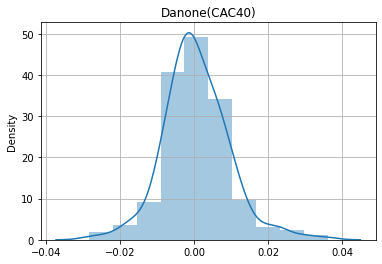

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


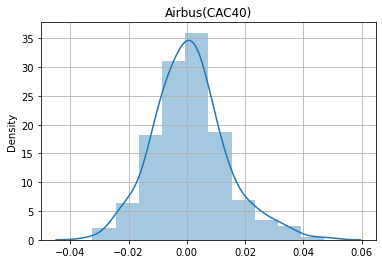

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


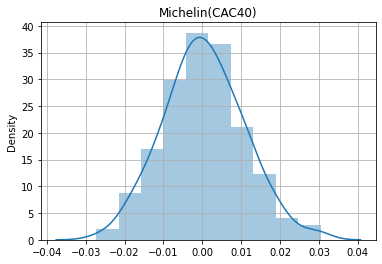

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


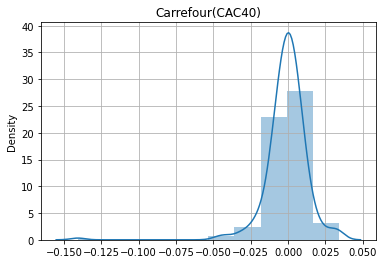

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


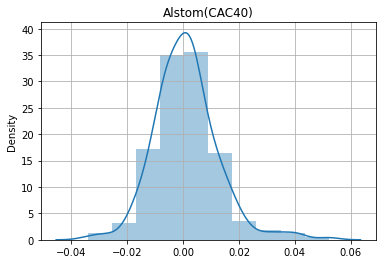

In [ ]:
for i in range(len(profitability_for_well_known_tickers)):
  plt.grid()
  sns.distplot(profitability_for_well_known_tickers[i], bins=10)
  plt.title(well_known_names[i])
  plt.show()

**На следующих графиках красная линия соответсвует нормальному распределению, с соответствующими конкретному активу мат. ожиданием и дисперсией**

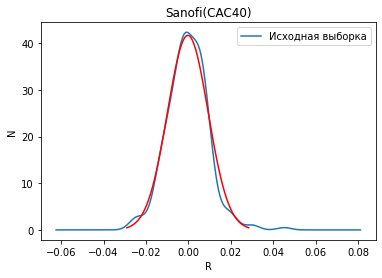

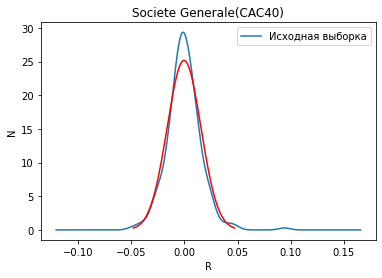

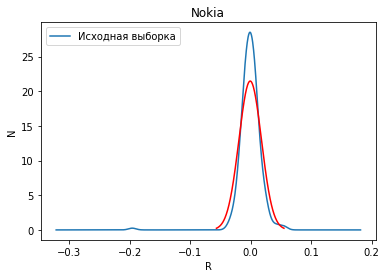

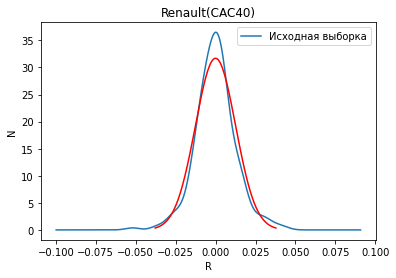

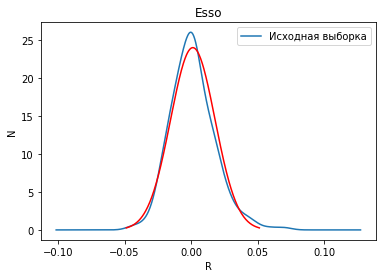

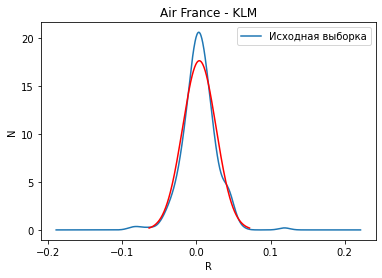

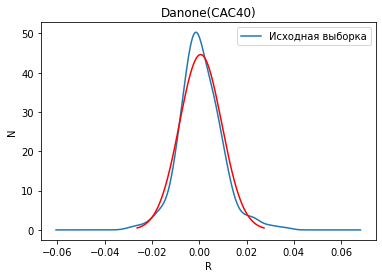

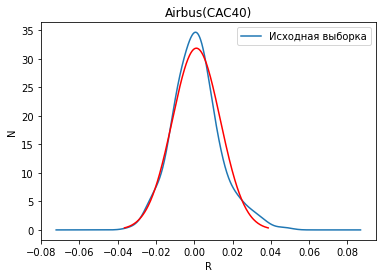

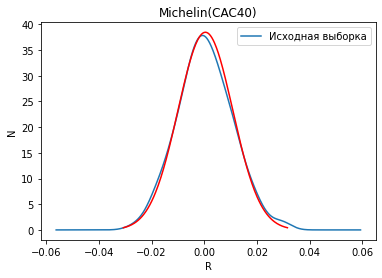

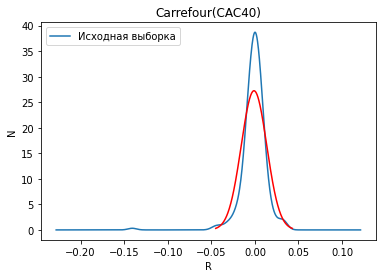

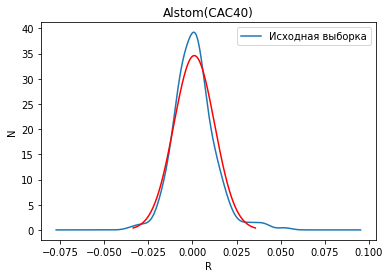

In [ ]:
for i in range(len(profitability_for_well_known_tickers)):
  mean = np.mean(profitability_for_well_known_tickers[i])
  sigma = np.var(profitability_for_well_known_tickers[i])
  std = math.sqrt(sigma)
  x = np.linspace(mean - 3*std, mean + 3*std, num = 255)
  pdf = norm.pdf(x , loc = mean, scale = std)
  pd.DataFrame(profitability_for_well_known_tickers[i]).plot.kde()
  plt.title(well_known_names[i])
  plt.xlabel('R')
  plt.ylabel('N')
  plt.legend(['Исходная выборка'])
  plt.plot(x,pdf , color = 'red')

**Проверка на нормальное распределение с помощью normaltest (D’Agostino and Pearson’s)**

In [ ]:
alpha = 0.05
for i in range(len(profitability_for_well_known_tickers)):
  k2, p_value = stats.normaltest(profitability_for_well_known_tickers[i])
  answer = 'не отклоняется' if p_value > alpha else 'отклоняется'
  print("\t {}: Гипотеза о нормальном распределении {}, p-value={:.10f}".format(well_known_names[i], answer, p_value))

	 Sanofi(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.0000059014
	 Societe Generale(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.0000000000
	 Nokia: Гипотеза о нормальном распределении отклоняется, p-value=0.0000000000
	 Renault(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.0010172581
	 Esso: Гипотеза о нормальном распределении отклоняется, p-value=0.0000041850
	 Air France - KLM: Гипотеза о нормальном распределении отклоняется, p-value=0.0000022378
	 Danone(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.0000370329
	 Airbus(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.0004965052
	 Michelin(CAC40): Гипотеза о нормальном распределении не отклоняется, p-value=0.5597789696
	 Carrefour(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.0000000000
	 Alstom(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.0000000013


**Проверка на нормальное распределение с помощью теста Колмогорова**

**Тест принимает стандартизированные наблюдения**

In [ ]:
mean_for_well_known = []
dispersion_for_well_known = []

for i in range(len(profitability_for_well_known_tickers)):
  mean_for_well_known.append(np.mean(profitability_for_well_known_tickers[i]))
  dispersion_for_well_known.append(np.std(profitability_for_well_known_tickers[i]))

In [ ]:
alfa=0.05
for i in range(len(profitability_for_well_known_tickers)):
  ks_statistic, p_value = kstest((profitability_for_well_known_tickers[i]-mean_for_well_known[i])/dispersion_for_well_known[i], 'norm')
  answer = 'не отклоняется' if p_value > alfa else 'отклоняется'
  print("\t {}: Гипотеза о нормальном распределении {}, p-value={:f}".format(well_known_names[i], answer, p_value))

	 Sanofi(CAC40): Гипотеза о нормальном распределении не отклоняется, p-value=0.466378
	 Societe Generale(CAC40): Гипотеза о нормальном распределении не отклоняется, p-value=0.299500
	 Nokia: Гипотеза о нормальном распределении отклоняется, p-value=0.006212
	 Renault(CAC40): Гипотеза о нормальном распределении не отклоняется, p-value=0.108908
	 Esso: Гипотеза о нормальном распределении не отклоняется, p-value=0.150958
	 Air France - KLM: Гипотеза о нормальном распределении не отклоняется, p-value=0.253446
	 Danone(CAC40): Гипотеза о нормальном распределении не отклоняется, p-value=0.380012
	 Airbus(CAC40): Гипотеза о нормальном распределении не отклоняется, p-value=0.279985
	 Michelin(CAC40): Гипотеза о нормальном распределении не отклоняется, p-value=0.813314
	 Carrefour(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.000126
	 Alstom(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.027736


**Проверка на распределение Стьюдента с помощью теста Колмогорова**

In [ ]:
alfa=0.05
for i in range(len(profitability_for_well_known_tickers)):
  ks_statistic, p_value = kstest((profitability_for_well_known_tickers[i]-mean_for_well_known[i])/dispersion_for_well_known[i], 't',args = (len(profitability_for_well_known_tickers[i]), ))
  answer = 'не отклоняется' if p_value > alfa else 'отклоняется'
  print("\t {}: Гипотеза о распределении Стьюдента {}, p-value={:f}".format(well_known_names[i], answer, p_value))

	 Sanofi(CAC40): Гипотеза о распределении Стьюдента не отклоняется, p-value=0.457265
	 Societe Generale(CAC40): Гипотеза о распределении Стьюдента не отклоняется, p-value=0.296909
	 Nokia: Гипотеза о распределении Стьюдента отклоняется, p-value=0.006050
	 Renault(CAC40): Гипотеза о распределении Стьюдента не отклоняется, p-value=0.106647
	 Esso: Гипотеза о распределении Стьюдента не отклоняется, p-value=0.149601
	 Air France - KLM: Гипотеза о распределении Стьюдента не отклоняется, p-value=0.249970
	 Danone(CAC40): Гипотеза о распределении Стьюдента не отклоняется, p-value=0.379834
	 Airbus(CAC40): Гипотеза о распределении Стьюдента не отклоняется, p-value=0.275190
	 Michelin(CAC40): Гипотеза о распределении Стьюдента не отклоняется, p-value=0.813268
	 Carrefour(CAC40): Гипотеза о распределении Стьюдента отклоняется, p-value=0.000122
	 Alstom(CAC40): Гипотеза о распределении Стьюдента отклоняется, p-value=0.027358


**Гистограммы для объемов продаж**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


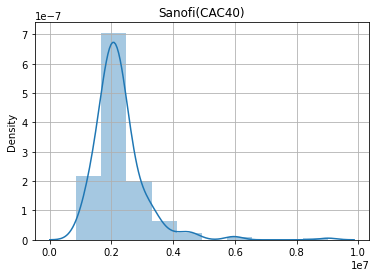

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


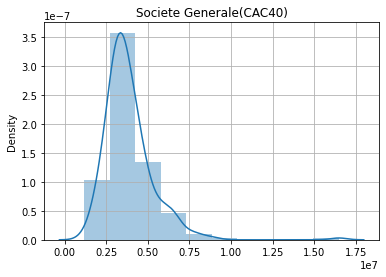

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


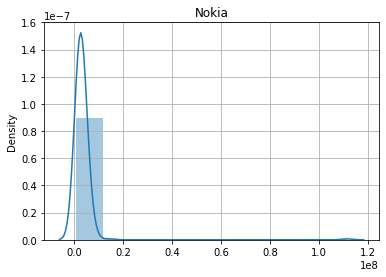

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


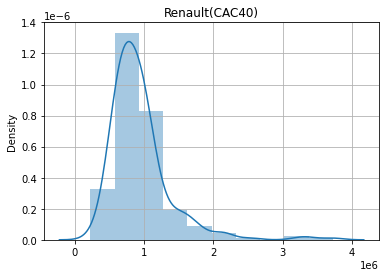

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


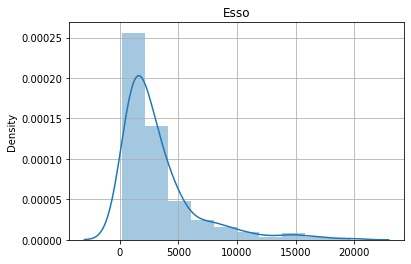

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


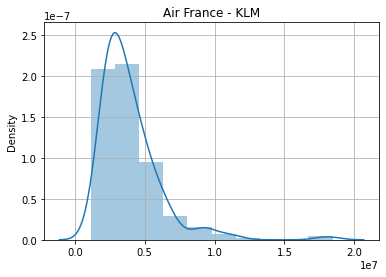

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


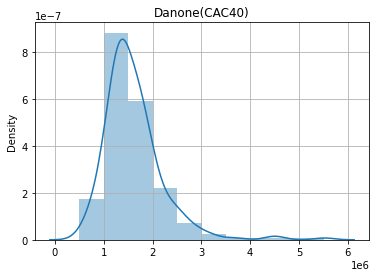

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


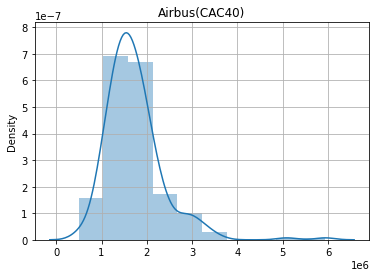

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


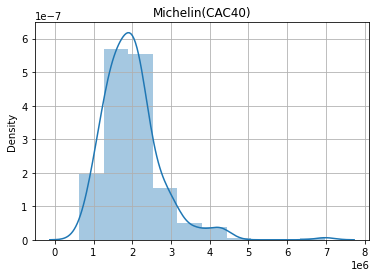

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


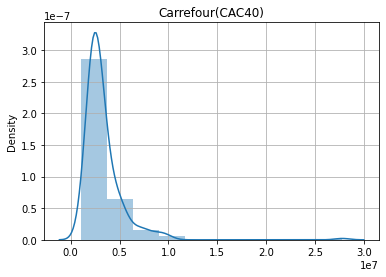

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


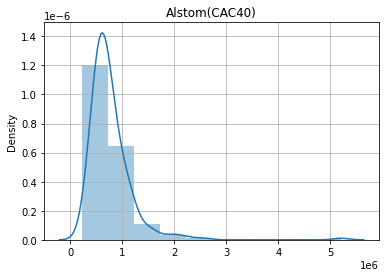

In [ ]:
for i in range(len(volume_for_well_known_tickers)):
  plt.grid()
  sns.distplot(volume_for_well_known_tickers[i], bins=10)
  plt.title(well_known_names[i])
  plt.show()

**На следующих графиках красная линия соответсвует нормальному распределению, с соответствующими конкретному активу мат. ожиданием и дисперсией**

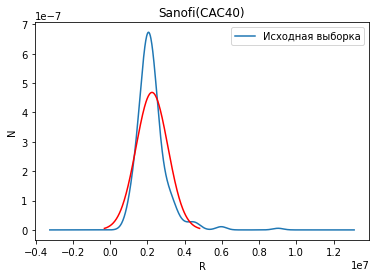

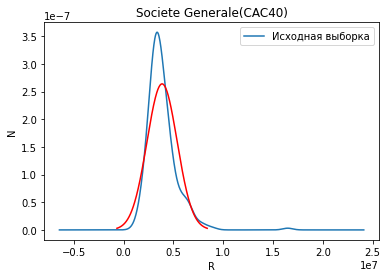

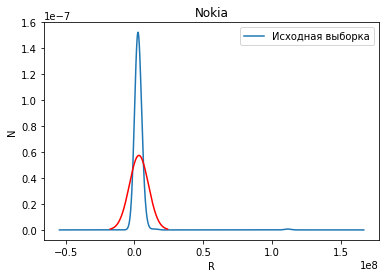

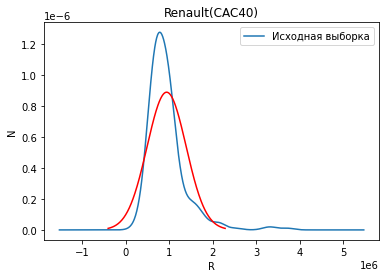

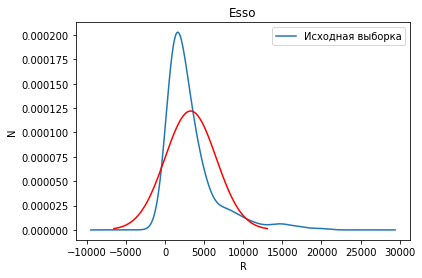

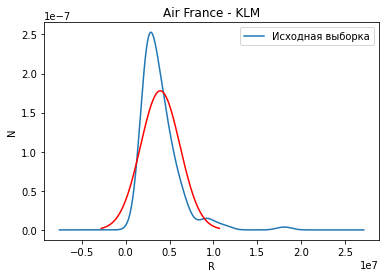

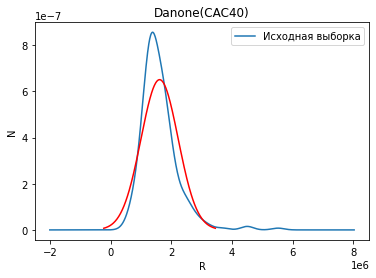

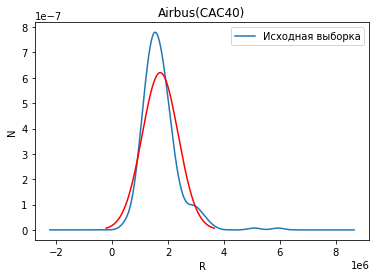

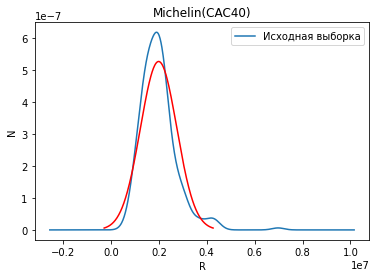

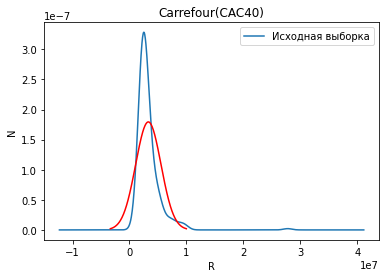

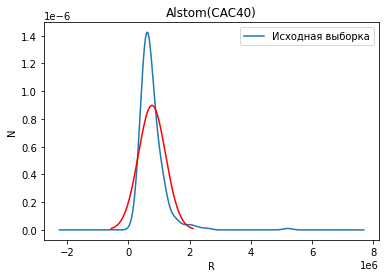

In [ ]:
for i in range(len(volume_for_well_known_tickers)):
  mean = np.mean(volume_for_well_known_tickers[i])
  sigma = np.var(volume_for_well_known_tickers[i])
  std = math.sqrt(sigma)
  x = np.linspace(mean - 3*std, mean + 3*std, num = 255)
  pdf = norm.pdf(x , loc = mean, scale = std)
  pd.DataFrame(volume_for_well_known_tickers[i]).plot.kde()
  plt.title(well_known_names[i])
  plt.xlabel('R')
  plt.ylabel('N')
  plt.legend(['Исходная выборка'])
  plt.plot(x,pdf , color = 'red')

**Проверка на нормальное распределение с помощью normaltest (D’Agostino and Pearson’s)**

In [ ]:
alpha = 0.05
for i in range(len(volume_for_well_known_tickers)):
  k2, p_value = stats.normaltest(volume_for_well_known_tickers[i])
  answer = 'не отклоняется' if p_value > alfa else 'отклоняется'
  print("\t {}: Гипотеза о нормальном распределении {}, p-value={:f}".format(well_known_names[i], answer, p_value))

	 Sanofi(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.000000
	 Societe Generale(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.000000
	 Nokia: Гипотеза о нормальном распределении отклоняется, p-value=0.000000
	 Renault(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.000000
	 Esso: Гипотеза о нормальном распределении отклоняется, p-value=0.000000
	 Air France - KLM: Гипотеза о нормальном распределении отклоняется, p-value=0.000000
	 Danone(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.000000
	 Airbus(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.000000
	 Michelin(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.000000
	 Carrefour(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.000000
	 Alstom(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.000000


**Проверка на нормальное распределение с помощью теста Колмогорова**

In [ ]:
mean_for_well_known_volume = []
dispersion_for_well_known_volume = []

for i in range(len(volume_for_well_known_tickers)):
  mean_for_well_known_volume.append(np.mean(volume_for_well_known_tickers[i]))
  dispersion_for_well_known_volume.append(np.std(volume_for_well_known_tickers[i]))

In [ ]:
alfa=0.05
for i in range(len(volume_for_well_known_tickers)):
  ks_statistic, p_value = kstest((volume_for_well_known_tickers[i]-mean_for_well_known_volume[i])/dispersion_for_well_known_volume[i], 'norm')
  answer = 'не отклоняется' if p_value > alfa else 'отклоняется'
  print("\t {}: Гипотеза о нормальном распределении {}, p-value={:f}".format(well_known_names[i], answer, p_value))

	 Sanofi(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.000007
	 Societe Generale(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.000535
	 Nokia: Гипотеза о нормальном распределении отклоняется, p-value=0.000000
	 Renault(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.000001
	 Esso: Гипотеза о нормальном распределении отклоняется, p-value=0.000000
	 Air France - KLM: Гипотеза о нормальном распределении отклоняется, p-value=0.000178
	 Danone(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.000856
	 Airbus(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.001818
	 Michelin(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.002058
	 Carrefour(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.000000
	 Alstom(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.000005


**Проверка на распределение Стьюдента с помощью теста Колмогорова**

In [ ]:
alfa=0.05
for i in range(len(volume_for_well_known_tickers)):
  ks_statistic, p_value = kstest((volume_for_well_known_tickers[i]-mean_for_well_known_volume[i])/dispersion_for_well_known_volume[i], 't',args = (len(volume_for_well_known_tickers[i]), ))
  answer = 'не отклоняется' if p_value > alfa else 'отклоняется'
  print("\t {}: Гипотеза о нормальном распределении {}, p-value={:f}".format(well_known_names[i], answer, p_value))

	 Sanofi(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.000007
	 Societe Generale(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.000534
	 Nokia: Гипотеза о нормальном распределении отклоняется, p-value=0.000000
	 Renault(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.000001
	 Esso: Гипотеза о нормальном распределении отклоняется, p-value=0.000000
	 Air France - KLM: Гипотеза о нормальном распределении отклоняется, p-value=0.000178
	 Danone(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.000846
	 Airbus(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.001783
	 Michelin(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.002019
	 Carrefour(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.000000
	 Alstom(CAC40): Гипотеза о нормальном распределении отклоняется, p-value=0.000005


**Для объемов продаж гипотезы о нормальном распределении при проверке тестом Колмогорова и D’Agostino and Pearson’s отвергаются для любых активов из рассмотренных. Для доходностей гипотеза о нормальном распределении или гипотеза о распределении Стьюдента верны для большинства рассматриваемых активов. Нормальному или распределению Стьюдента не соответствуют выборки для активов Alstom, Carrefour, Nokia**

##**8.	Исследовать зависимости (выборочно) между доходностями различных активов с помощью техники анализа зависимостей. Сделайте анализ зависимостей между парами активов для активов из одного производственного сектора и для активов из разных производственных секторов. Сделайте анализ зависимости (выборочно) между доходностями и объемами продаж одного актива. Рассмотрите активы из разных производственных секторов.**

**Для исследования зависимостей между доходностями активов, воспользуемся коэффициентом корреляции Пирсона. Он определяется на отрезке от -1 до 1 и характеризует существование линейной связи между двумя случайными величинами (говорит нам о том, на сколько хорошо одна случайная величина выражается как линейная функция другой). Его формула:**

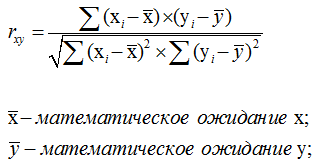

In [ ]:
pearson = profitability.corr () # Расчет коэффициента корреляции Пирсона
pearson

,AAA.PA,AB.PA,ABCA.PA,ABEO.PA,ABIO.PA,ABNX.PA,ABVX.PA,AC.PA,ACA.PA,ACAN.PA,...,VIV.PA,VK.PA,VLA.PA,VLTSA.PA,VMX.PA,VRAP.PA,VTR.PA,WAVE.PA,WLN.PA,XIL.PA
AAA.PA,1.000000,0.070109,-0.072117,-0.012039,0.032950,0.011891,0.054549,0.049413,-0.037151,0.005710,...,-0.027496,-0.074737,-0.005252,-0.047675,-0.052454,-0.042695,-0.027637,-0.017431,0.140882,0.107498
AB.PA,0.070109,1.000000,0.101853,-0.142293,-0.031898,0.029133,0.051735,0.005998,0.087796,-0.074710,...,0.064349,0.153672,0.148941,0.146339,0.094974,-0.157590,0.105634,-0.046234,0.038643,0.128101
ABCA.PA,-0.072117,0.101853,1.000000,0.129922,0.056228,-0.084217,-0.038327,0.092721,0.230961,0.059807,...,0.053473,0.077460,-0.014007,0.074271,0.150052,0.032912,-0.041608,0.046243,0.048663,0.120875
ABEO.PA,-0.012039,-0.142293,0.129922,1.000000,0.095787,0.057877,0.040313,0.033223,0.030771,0.039877,...,0.064514,0.068002,0.062971,-0.007578,0.124083,0.074088,-0.156147,0.069328,0.017539,0.103098
ABIO.PA,0.032950,-0.031898,0.056228,0.095787,1.000000,0.047635,0.049586,0.073705,0.062484,0.049310,...,0.134754,0.054267,0.089733,0.065747,-0.018124,-0.007943,0.069993,0.051422,0.007567,-0.026786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VRAP.PA,-0.042695,-0.157590,0.032912,0.074088,-0.007943,0.040087,-0.005212,0.054387,0.105647,-0.018823,...,0.065512,0.049826,0.044167,0.069880,0.007153,1.000000,0.087114,0.058800,-0.023147,0.075673
VTR.PA,-0.027637,0.105634,-0.041608,-0.156147,0.069993,0.006343,0.001336,0.062864,-0.041525,-0.015980,...,0.070507,0.072114,0.102477,0.092295,0.110655,0.087114,1.000000,-0.007390,0.099007,-0.012986
WAVE.PA,-0.017431,-0.046234,0.046243,0.069328,0.051422,0.021270,-0.270474,0.109858,0.070960,0.000664,...,0.091594,0.052169,-0.011994,0.083473,-0.086902,0.058800,-0.007390,1.000000,0.022479,0.018595
WLN.PA,0.140882,0.038643,0.048663,0.017539,0.007567,-0.021622,-0.071514,0.120055,0.102603,-0.055840,...,0.180326,-0.023149,0.067320,0.036747,-0.061696,-0.023147,0.099007,0.022479,1.000000,0.131003


In [ ]:
# for col in pearson.columns: # проверка на то, что в таблице нет значений с корреляцией ТОЧНО равной 0 (нужно для создания верхнетреугольной матрицы и подсчёта распределения коэффициентов корреляции)
#     for row in pearson.index:
#         if pearson[col][row] == 0.0:
#             print(col, row) # ожидается отсутствие вывода

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


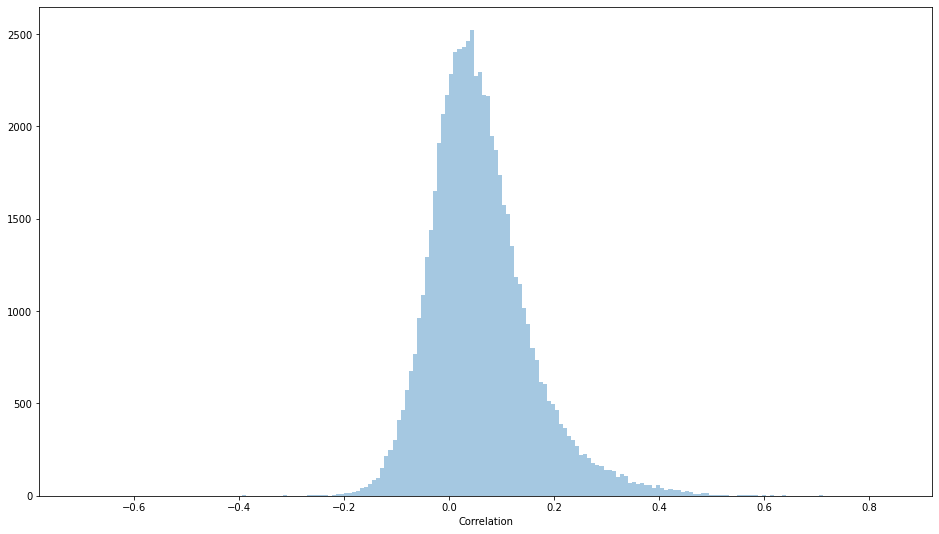

In [ ]:
# гистограмма распределения частоты встречаемых коэффициентов корреляции
tri_upper_diag = np.triu(pearson, k=1) # создаём верхнетреугольную матрицу, у которой нижняя часть заполнена нулями (чтобы значения корреляции не дублировались; k=1 чтобы сбросить главную диагональ)
tri_upper_diag = pd.DataFrame(tri_upper_diag, index=pearson.index, columns=pearson.columns) # перевод верхнетреугольной матрицы в dataframe
tri_upper_diag.replace(0.0, np.nan, inplace=True) # замена нулей на NaN, чтобы не брать нули при построении гистограммы
# tri_upper_diag.value_counts()
plt.figure(figsize=(16,9))
sns.distplot(tri_upper_diag, bins=200, kde=False, axlabel="Correlation")

**Рассмотрим активы (10) из одного производственного сектора, например, из области строительства.**

In [ ]:
N = 10

construction_tickers = ["SGO.PA", "DG.PA", "EN.PA", "FGR.PA", "ASY.PA", "SOG.PA", "COM.PA", "TKTT.PA", "HOLN.PA", "INFE.PA"]

# проверка, что у нас есть данные о выбранных тикерах
for tic in construction_tickers:
    if tic not in data_close.columns:
        print(tic) # ожидается отсутствие вывода

In [ ]:
# корреляция среди тикеров выбранной отрасли

construction_tickers_correlation = []
for i in range(N):
    construction_tickers_correlation.append([])
    for j in range(N):
        construction_tickers_correlation[i].append(pearson[construction_tickers[i]][construction_tickers[j]])  # берём значения из полной таблицы корреляций с поиском по столбцу и строке
construction_tickers_correlation = pd.DataFrame(construction_tickers_correlation, index=construction_tickers, columns=construction_tickers) # перевод в dataframe
construction_tickers_correlation

,SGO.PA,DG.PA,EN.PA,FGR.PA,ASY.PA,SOG.PA,COM.PA,TKTT.PA,HOLN.PA,INFE.PA
SGO.PA,1.000000,0.549793,0.559417,0.579479,0.194592,0.120230,0.071977,0.491324,0.429748,-0.012233
DG.PA,0.549793,1.000000,0.639078,0.775838,0.119266,0.126211,0.064472,0.346098,0.277822,-0.002941
EN.PA,0.559417,0.639078,1.000000,0.621217,0.139566,0.081244,0.112119,0.364975,0.313463,0.006405
FGR.PA,0.579479,0.775838,0.621217,1.000000,0.166106,0.098587,0.198324,0.353452,0.236267,-0.049177
ASY.PA,0.194592,0.119266,0.139566,0.166106,1.000000,0.021860,0.130100,0.104383,0.024972,0.079109
SOG.PA,0.120230,0.126211,0.081244,0.098587,0.021860,1.000000,0.041547,0.092130,0.004516,0.142093
COM.PA,0.071977,0.064472,0.112119,0.198324,0.130100,0.041547,1.000000,0.052826,-0.030981,-0.026482
TKTT.PA,0.491324,0.346098,0.364975,0.353452,0.104383,0.092130,0.052826,1.000000,0.256082,0.038450
HOLN.PA,0.429748,0.277822,0.313463,0.236267,0.024972,0.004516,-0.030981,0.256082,1.000000,0.085635
INFE.PA,-0.012233,-0.002941,0.006405,-0.049177,0.079109,0.142093,-0.026482,0.038450,0.085635,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


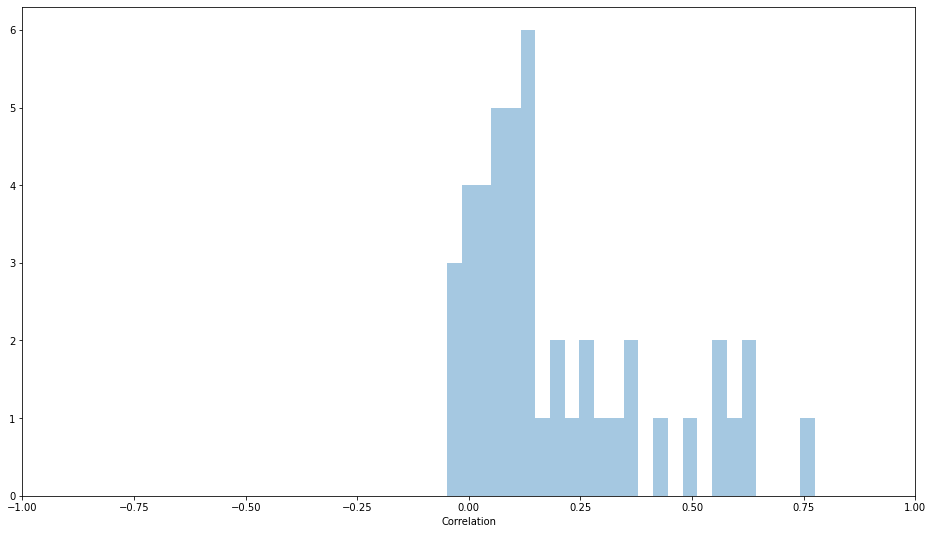

In [ ]:
triu_pearson_construction = np.triu(construction_tickers_correlation, k=1) # создаём верхнетреугольную матрицу, у которой нижняя часть заполнена нулями (чтобы значения корреляции не дублировались; k=1 чтобы сбросить главную диагональ)
triu_pearson_construction = pd.DataFrame(triu_pearson_construction, index=construction_tickers, columns=construction_tickers) # перевод верхнетреугольной матрицы в dataframe
triu_pearson_construction.replace(0.0, np.nan, inplace=True) # замена нулей на NaN, чтобы не брать нули при построении гистограммы
plt.figure(figsize=(16,9))
plt.xlim([-1, 1])
sns.distplot(triu_pearson_construction, bins=25, kde=False, axlabel="Correlation")

**Согласно гистограмме, между некоторыми акциями из выбранной отрасли "строительство" имеются сильные корреляционные зависимости. Построим граф, где ребро между активами будет проводиться тогда и только тогда, когда значение корреляции между ними > 0.5.**

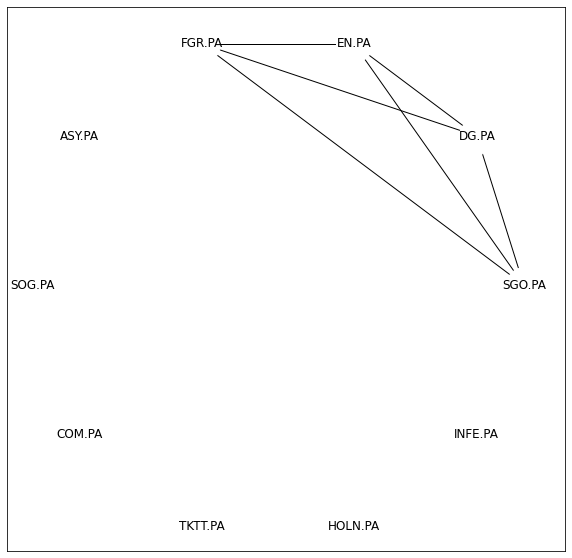

In [ ]:
# граф рёбер между активами, порог 0.5

adj_construction_max = construction_tickers_correlation.copy() # заготовка для матрицы смежности
for col in construction_tickers:
    for row in construction_tickers:
        if construction_tickers_correlation[col][row] > 0.5 and col != row: # ребро между активами <===> корреляция между активами > 0.5
            adj_construction_max[col][row] = 1
        else:
            adj_construction_max[col][row] = 0
adj_construction_max = adj_construction_max.astype(int) # убедимся, что все значения типа int (1 - есть ребро, 0 - нет ребра)

G_construction_max = nx.Graph(adj_construction_max) # создаём граф по матрице смежности

pos = nx.circular_layout(G_construction_max) # для кругового вида
plt.figure(figsize=(10,10)) # размер графика
nx.draw_networkx(G_construction_max, pos, with_labels=True, node_size=1300, node_color="white") # вывод графика

**Как видно из графа, максимальной кликой является [FGR.PA, EN.PA, DG.PA, SGO.PA]**

**Найдём тикеры, между которыми максимальная корреляция.**

In [ ]:
max_corr = [-1, None,None]
for col in construction_tickers:
    for row in construction_tickers:
        if triu_pearson_construction[col][row] > max_corr[0]:
            max_corr = [triu_pearson_construction[col][row], col, row]
max_corr

[0.7758375629099905, 'FGR.PA', 'DG.PA']

**Проведём аналогичные рассуждения, но теперь для нахождения независимого множества, то есть набора акций, корреляция между двумя любыми элементами которого от -0.1 до 0.1. Данные сведения могут понадобиться для сбора диверсифицированного портфеля.**


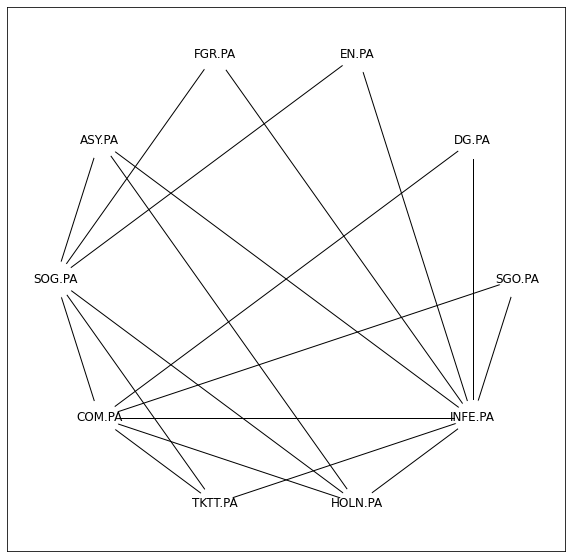

In [ ]:
# граф рёбер между активами, порог -0.1...0.1

adj_construction_min = construction_tickers_correlation.copy() # заготовка для матрицы смежности
for col in construction_tickers:
    for row in construction_tickers:
        if -0.1 < construction_tickers_correlation[col][row] and construction_tickers_correlation[col][row] < 0.1: # ребро между активами <===> корреляция между активами -0.1 < cor < 0.1 
            adj_construction_min[col][row] = 1
        else:
            adj_construction_min[col][row] = 0
adj_construction_min = adj_construction_min.astype(int) # убедимся, что все значения типа int (1 - есть ребро, 0 - нет ребра)

G_construction_min = nx.Graph(adj_construction_min) # создаём граф по матрице смежности

pos = nx.circular_layout(G_construction_min) # для кругового вида
plt.figure(figsize=(10,10)) # размер графика
nx.draw_networkx(G_construction_min, pos, with_labels=True, node_size=1300, node_color="white") # вывод графика

In [ ]:
# поиск максимально независимых множеств
for clq in nx.clique.find_cliques(G_construction_min):
    print(clq)

['SOG.PA', 'COM.PA', 'TKTT.PA']
['SOG.PA', 'COM.PA', 'HOLN.PA']
['SOG.PA', 'EN.PA']
['SOG.PA', 'ASY.PA', 'HOLN.PA']
['SOG.PA', 'FGR.PA']
['INFE.PA', 'COM.PA', 'TKTT.PA']
['INFE.PA', 'COM.PA', 'HOLN.PA']
['INFE.PA', 'COM.PA', 'DG.PA']
['INFE.PA', 'COM.PA', 'SGO.PA']
['INFE.PA', 'EN.PA']
['INFE.PA', 'ASY.PA', 'HOLN.PA']
['INFE.PA', 'FGR.PA']


**Максимально независимое множество будет иметь размер 3: ['SOG.PA', 'TKTT.PA', 'COM.PA'], ['SOG.PA', 'HOLN.PA', 'ASY.PA'], ['SOG.PA', 'HOLN.PA', 'COM.PA'], ['INFE.PA', 'ASY.PA', 'HOLN.PA'], ['INFE.PA', 'COM.PA', 'TKTT.PA'], ['INFE.PA', 'COM.PA', 'HOLN.PA'], ['INFE.PA', 'COM.PA', 'SGO.PA'], ['INFE.PA', 'COM.PA', 'DG.PA']**

**Посчитаем среднее значение корреляции в этой отрасли.**

In [ ]:
# среднее значение корреляции среди выбранных активов

all_elements = N/2 * (N-1) # число элементов в верхнетреугольной матрице

construction_corr_summ = 0
for col in triu_pearson_construction.columns:
    for row in triu_pearson_construction.index:
        if not (pd.isna(triu_pearson_construction[col][row])):
            construction_corr_summ += triu_pearson_construction[col][row]
construction_mean = construction_corr_summ/all_elements
construction_mean

0.19975471953234925

**Теперь рассмотрим активы (10) из разных производственных секторов.**

In [ ]:
different_tickers = ["SGO.PA", "EOS.PA", "EKI.PA", "DBV.PA", "ABCA.PA", "CBOT.PA", "BEN.PA", "LPE.PA", "ERA.PA", "EC.PA"]

# проверка, что у нас есть данные о выбранных тикерах
# for tic in different_tickers:
#     if tic not in data_close.columns:
#         print(tic) # ожидается отсутствие вывода

In [ ]:
# корреляция среди тикеров выбранной отрасли

different_tickers_correlation = []
for i in range(N):
    different_tickers_correlation.append([])
    for j in range(N):
        different_tickers_correlation[i].append(pearson[different_tickers[i]][different_tickers[j]])  # берём значения из полной таблицы корреляций с поиском по столбцу и строке
different_tickers_correlation = pd.DataFrame(different_tickers_correlation, index=different_tickers, columns=different_tickers) # перевод в dataframe
different_tickers_correlation

,SGO.PA,EOS.PA,EKI.PA,DBV.PA,ABCA.PA,CBOT.PA,BEN.PA,LPE.PA,ERA.PA,EC.PA
SGO.PA,1.000000,-0.028401,0.202950,0.044836,0.090136,0.093566,0.288321,0.106365,0.322045,0.085487
EOS.PA,-0.028401,1.000000,-0.043494,0.078835,-0.009429,0.047343,-0.068107,0.076020,-0.023252,-0.005364
EKI.PA,0.202950,-0.043494,1.000000,0.032596,0.131225,0.087194,0.071135,-0.008182,0.073916,-0.018638
DBV.PA,0.044836,0.078835,0.032596,1.000000,-0.027506,-0.034252,0.032131,-0.061588,0.132964,-0.031651
ABCA.PA,0.090136,-0.009429,0.131225,-0.027506,1.000000,0.150242,0.263102,0.048114,0.230370,0.007277
CBOT.PA,0.093566,0.047343,0.087194,-0.034252,0.150242,1.000000,0.076067,-0.077039,0.100233,-0.135433
BEN.PA,0.288321,-0.068107,0.071135,0.032131,0.263102,0.076067,1.000000,0.112772,0.267567,0.109870
LPE.PA,0.106365,0.076020,-0.008182,-0.061588,0.048114,-0.077039,0.112772,1.000000,0.005531,0.008447
ERA.PA,0.322045,-0.023252,0.073916,0.132964,0.230370,0.100233,0.267567,0.005531,1.000000,0.178209
EC.PA,0.085487,-0.005364,-0.018638,-0.031651,0.007277,-0.135433,0.109870,0.008447,0.178209,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


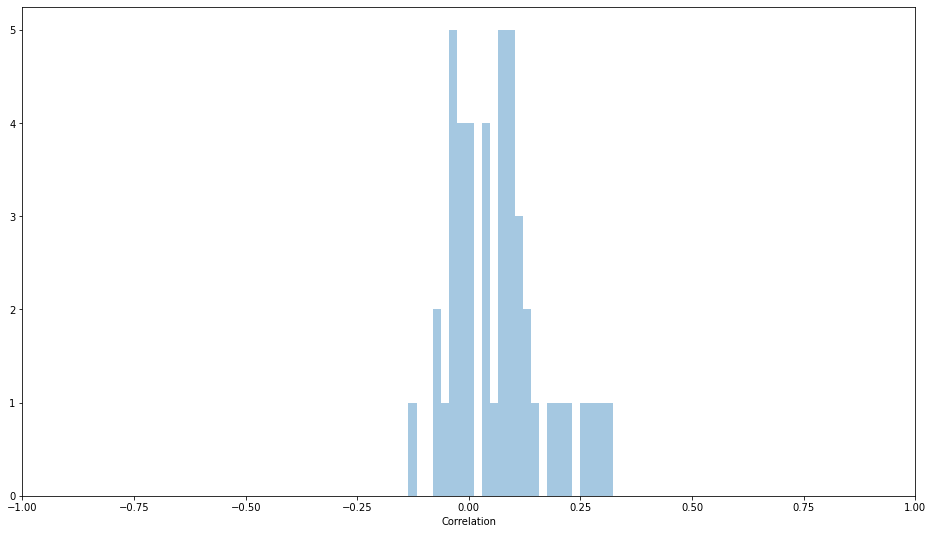

In [ ]:
triu_pearson_different = np.triu(different_tickers_correlation, k=1) # создаём верхнетреугольную матрицу, у которой нижняя часть заполнена нулями (чтобы значения корреляции не дублировались; k=1 чтобы сбросить главную диагональ)
triu_pearson_different = pd.DataFrame(triu_pearson_different, index=different_tickers, columns=different_tickers) # перевод верхнетреугольной матрицы в dataframe
triu_pearson_different.replace(0.0, np.nan, inplace=True) # замена нулей на NaN, чтобы не брать нули при построении гистограммы
plt.figure(figsize=(16,9))
plt.xlim([-1, 1])
sns.distplot(triu_pearson_different, bins=25, kde=False, axlabel="Correlation")

**В отличие от гистограммы для определённой отрасли, акции в различных не имею столь сильной корреляционной связи. Следовательно, сбор портфеля с коррелированными акциями на сделанной выборке не имеет особого смысла. Рассмотрим вариант сбора акций в диверсифицированный портфель, найдём максимальное независимое подмножество. Построим граф, где ребро между активами будет проводиться тогда и только тогда, когда значение корреляции между ними лежит на отрезке от -0.1 до 0.1.**

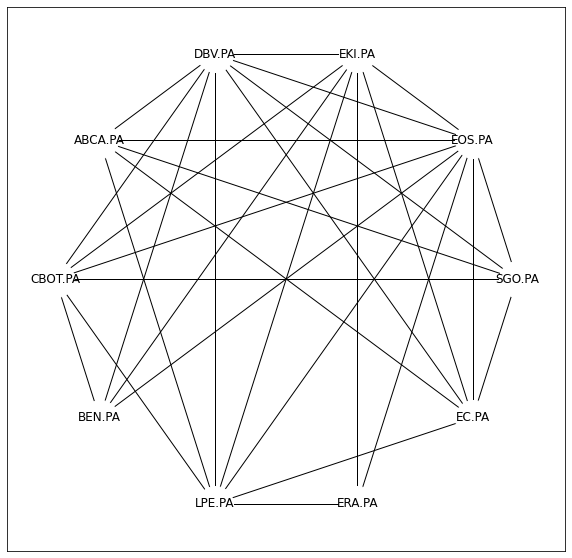

In [ ]:
# граф рёбер между активами, порог -0.1...0.1

adj_different_min = different_tickers_correlation.copy() # заготовка для матрицы смежности
for col in different_tickers:
    for row in different_tickers:
        if -0.1 < different_tickers_correlation[col][row] and different_tickers_correlation[col][row] < 0.1: # ребро между активами <===> корреляция между активами -0.1 < cor < 0.1 
            adj_different_min[col][row] = 1
        else:
            adj_different_min[col][row] = 0
adj_different_min = adj_different_min.astype(int) # убедимся, что все значения типа int (1 - есть ребро, 0 - нет ребра)

G_different_min = nx.Graph(adj_different_min) # создаём граф по матрице смежности

pos = nx.circular_layout(G_different_min) # для кругового вида
plt.figure(figsize=(10,10)) # размер графика
nx.draw_networkx(G_different_min, pos, with_labels=True, node_size=1300, node_color="white") # вывод графика

In [ ]:
# поиск максимально независимых множеств
for clq in nx.clique.find_cliques(G_different_min):
    print(clq)

['EOS.PA', 'DBV.PA', 'EC.PA', 'ABCA.PA', 'SGO.PA']
['EOS.PA', 'DBV.PA', 'EC.PA', 'ABCA.PA', 'LPE.PA']
['EOS.PA', 'DBV.PA', 'EC.PA', 'EKI.PA', 'LPE.PA']
['EOS.PA', 'DBV.PA', 'CBOT.PA', 'SGO.PA']
['EOS.PA', 'DBV.PA', 'CBOT.PA', 'EKI.PA', 'LPE.PA']
['EOS.PA', 'DBV.PA', 'CBOT.PA', 'EKI.PA', 'BEN.PA']
['EOS.PA', 'ERA.PA', 'LPE.PA', 'EKI.PA']


**Максимально независимое множество теперь имеет размер 5: ['EOS.PA', 'DBV.PA', 'SGO.PA', 'EC.PA', 'ABCA.PA'], ['EOS.PA', 'DBV.PA', 'LPE.PA', 'EC.PA', 'ABCA.PA'], ['EOS.PA', 'DBV.PA', 'LPE.PA', 'EC.PA', 'EKI.PA'], ['EOS.PA', 'DBV.PA', 'LPE.PA', 'CBOT.PA', 'EKI.PA'], ['EOS.PA', 'DBV.PA', 'BEN.PA', 'CBOT.PA', 'EKI.PA'].**

**Посчитаем среднее значение корреляции акций, взятых из разных отраслей.**

In [ ]:
# среднее значение корреляции среди выбранных активов

different_corr_summ = 0
for col in triu_pearson_different.columns:
    for row in triu_pearson_different.index:
        if not (pd.isna(triu_pearson_different[col][row])):
            different_corr_summ += triu_pearson_different[col][row]
different_mean = different_corr_summ/all_elements
different_mean

0.06627841442982378

**Среднее значение корреляции очень близко к нулю.**

**Исходя из полученных результатов, можно прийти к выводу, что для сбора диверсифицированного портфеля выгоднее брать акции компаний из разных производственных секторов (отраслей промышленности), так как независимые множества в них имеют больший размер и оценка корреляции приближена к нулю. Для сбора портфеля из зависимых акций — всё наоборот, желательно брать акции из одной отрасли.**

**Проведём анализ зависимости между доходностями и объёмами продаж.**

In [ ]:
different_tickers_profitability = profitability[different_tickers] # матрица доходностей для тикеров из разных отраслей
different_tickers_volume = data_volume[different_tickers] # матрица числа продаж для тикеров из разных отраслей

different_tickers_corr_prof_volume = []

# проверка на NaN
# for col in different_tickers_volume.columns:
#     for row in different_tickers_volume.index:
#         if pd.isna(different_tickers_volume[col][row]) or pd.isna(different_tickers_profitability[col][row]):
#             print(col, row)

for tic in different_tickers:
    different_tickers_corr_prof_volume.append(np.corrcoef(different_tickers_profitability[tic], different_tickers_volume[tic])[0][1])

different_tickers_corr_prof_volume = pd.DataFrame(different_tickers_corr_prof_volume, columns = ["correlation between profitability and volume"], index = different_tickers)
different_tickers_corr_prof_volume

,correlation between profitability and volume
SGO.PA,0.066377
EOS.PA,0.525042
EKI.PA,-0.131132
DBV.PA,-0.695658
ABCA.PA,-0.054160
CBOT.PA,0.175349
BEN.PA,0.222042
LPE.PA,0.077684
ERA.PA,0.032560
EC.PA,0.149067


**Как видно, корреляция между объёмом продаж может как быть (тикеры EOS.PA и DBV.PA), так и отсутствовать (SGO.PA, ABCA.PA, LPE.PA, ERA.PA)**

**Рассмотрим графики зависимости значений доходности и объёма продаж при малой корреляции, например, для SGO.PA.**

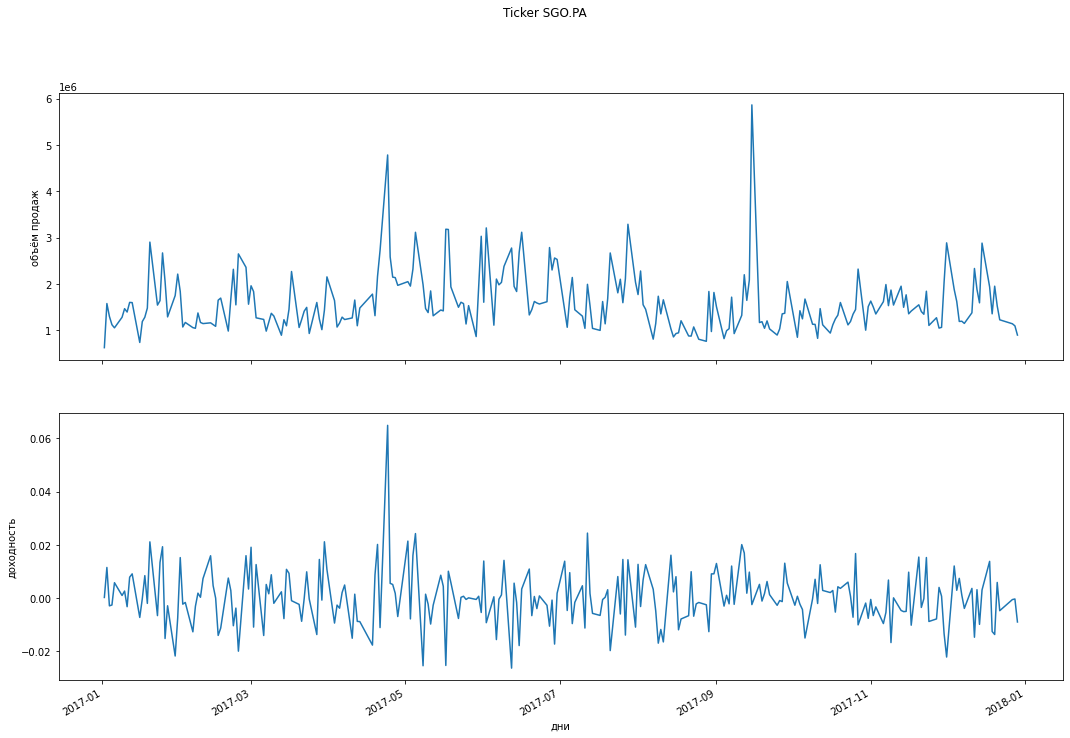

In [ ]:
fig, ax = plt.subplots(2, figsize=(18,12))
fig.suptitle('Ticker SGO.PA')

ax[0].plot(different_tickers_profitability.index, different_tickers_volume["SGO.PA"])
ax[0].set(xlabel='дни', ylabel='объём продаж')
ax[1].plot(different_tickers_volume.index, different_tickers_profitability["SGO.PA"])
ax[1].set(xlabel='дни', ylabel='доходность')

# спрятать x и y lable для соседних графиков
# for a in ax.flat:
#     a.label_outer()

#повернуть подписи по оси x
fig.autofmt_xdate()

**Корреляция на графике прослеживается только в районе майских продаж.**

**Рассмотрим графики для наиболее интересных случаев, а именно для тикеров EOS.PA и DBV.PA.**

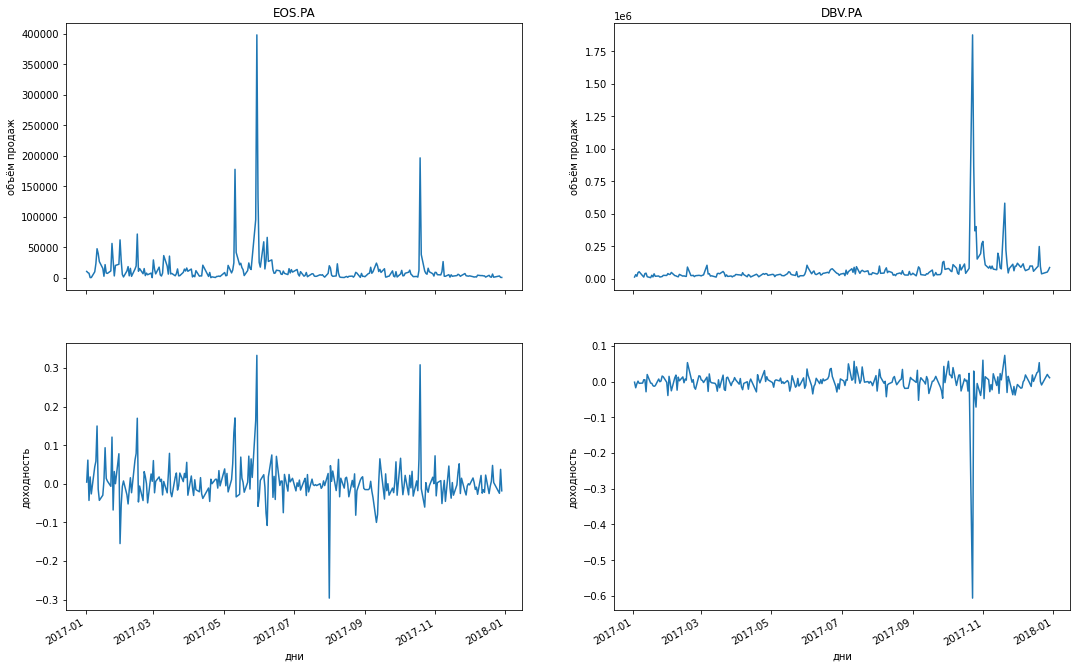

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(18,12))

ax[0, 0].plot(different_tickers_volume.index, different_tickers_volume["EOS.PA"])
ax[0, 0].set_title("EOS.PA")
ax[0, 0].set(xlabel='дни', ylabel='объём продаж')
ax[1, 0].plot(different_tickers_profitability.index, different_tickers_profitability["EOS.PA"])
ax[1, 0].set(xlabel='дни', ylabel='доходность')

ax[0, 1].plot(different_tickers_volume.index, different_tickers_volume["DBV.PA"])
ax[0, 1].set_title("DBV.PA")
ax[0, 1].set(xlabel='дни', ylabel='объём продаж')
ax[1, 1].plot(different_tickers_profitability.index, different_tickers_profitability["DBV.PA"])
ax[1, 1].set(xlabel='дни', ylabel='доходность')

# # спрятать x и y lable для соседних графиков
# for a in ax.flat:
#     a.label_outer()

#повернуть подписи по оси x
fig.autofmt_xdate()

**Как видно, у тикеров с большой корреляцией (даже отрицательной) между доходностями и объёмом продаж хорошо прослеживается сходство в графиках, а именно, самые большие скачки в объёме продаж сопровождаются резким увеличением/уменьшением доходности.**

##**9. Попробуйте найти что-нибудь интересное (необычное) на вашем рынке. Используйте любые известные вам методы анализа данных**

**Найдём максимально коррелированные акции среди всех активов.**

In [ ]:
max_correlation = []

for col in pearson.columns:
    for row in pearson.index:
        if pearson[col][row] > 0.5 and pearson[col][row] != 1 and [pearson[col][row], row, col] not in max_correlation:
            max_correlation.append([pearson[col][row], col, row])
max_correlation.sort(key = lambda x: x[0], reverse=True) # сортировка по убыванию

**Рассмотрим среди них десятку самых больших значений (рёбер).**

In [ ]:
max_correlation = max_correlation[:N]
max_correlation

[[0.8432111066382805, 'BNP.PA', 'GLE.PA'],
 [0.8059330285944456, 'ACA.PA', 'BNP.PA'],
 [0.7833082120678363, 'ACA.PA', 'GLE.PA'],
 [0.7758375629099905, 'DG.PA', 'FGR.PA'],
 [0.7268613261385272, 'CO.PA', 'RAL.PA'],
 [0.7089474563828481, 'EO.PA', 'FR.PA'],
 [0.7082712735402606, 'BNP.PA', 'CS.PA'],
 [0.7066737642913441, 'CS.PA', 'GLE.PA'],
 [0.6989890189272754, 'EO.PA', 'POM.PA'],
 [0.6836950578170885, 'CDI.PA', 'MC.PA']]

**Выведем связанные акции.**

In [ ]:
tics = [ x[1:3] for x in max_correlation]
tics = list((np.array(tics)).reshape(2*len(tics),))
# print(set(tics))
tics = list(set(tics)) # создали список уникальных тикеров

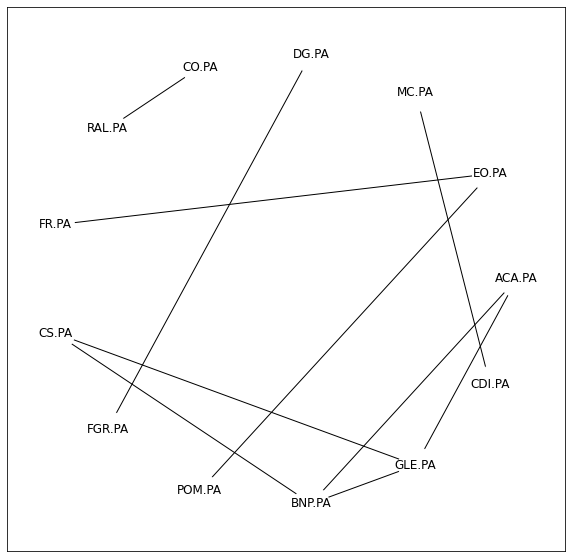

In [ ]:
adj_max_correlation = []
for i in range(len(tics)):
    adj_max_correlation.append([])
    for j in range(len(tics)):
        adj_max_correlation[i].append(pearson[tics[i]][tics[j]])  # берём значения из полной таблицы корреляций с поиском по столбцу и строке
adj_max_correlation = pd.DataFrame(adj_max_correlation, index=tics, columns=tics) # перевод в dataframe
adj_max_correlation

for col in tics:
    for row in tics:
        if adj_max_correlation[col][row] >= max_correlation[N-1][0] and col != row:
            adj_max_correlation[col][row] = int(1)
        else:
            adj_max_correlation[col][row] = int(0)
G_max_correlation = nx.Graph(adj_max_correlation) # создаём граф по матрице смежности

pos_max = nx.circular_layout(G_max_correlation) # для кругового вида
plt.figure(figsize=(10,10)) # размер графика
nx.draw_networkx(G_max_correlation, pos_max, with_labels=True, node_size=1300, node_color="white") # вывод графика

<pre>Тикеры и области:
'FGR.PA' - Eiffage (Industrials - Construction and Materials)
'ACA.PA' - Crédit Agricole (Financials - Banks)
'CS.PA' - AXA (Financials - Insurance)
'EO.PA' - Faurecia (Consumer Discretionary - Automobiles and Parts)
'MC.PA' - LVMH (Consumer Discretionary - Consumer Products and Services)
'DG.PA' - Vinci (Industrials - Construction and Materials)
'CDI.PA' - Christian Dior (Consumer Discretionary - Consumer Products and Services)
'CO.PA' - Casino, Guichard-Perrachon (Consumer Staples - Personal Care, Drug and Grocery Stores)
'RAL.PA' - Rallye (Consumer Discretionary - Retail)
'GLE.PA' - Société Générale Société anonyme (Financials - Banks)
'FR.PA' - Valeo (Consumer Discretionary - Automobiles and Parts)
'BNP.PA' - BNP Paribas (Financials - Banks)
'POM.PA' - Compagnie Plastic Omnium (Consumer Discretionary - Automobiles and Parts) </pre>

<pre>Согласно графу, как и ожидалось, высокие значения корреляции представлены для активов из одной отрасли:
'CDI.PA' и 'MC.PA' работают в области потребительских товаров и услуг, а именно - одежды и аксессуаров
'FGR.PA' и 'DG.PA' - заняты в индустриальном секторе, на строительстве и материалах
'POM.PA' и 'EO.PA' - автомобили и их запчасти, как и 'EO.PA' и 'FR.PA' ('POM.PA' и 'FR.PA' тоже были бы связаны, при меньшем пороге)
'GLE.PA' и 'BNP.PA' и 'ACA.PA' - финансовая сфера, банки.
Однако, нашлись клики и из смежных отраслей
'CO.PA' и 'RAL.PA' - хороший пример того, что акции компаний из смежных областей экономики (розничная торговля и торговля продуктами питания) могут быть коррелированными.
'GLE.PA' и 'BNP.PA' и 'CS.PA' все заняты в финансовом секторе, однако 'GLE.PA' и 'BNP.PA' - это банковская деятельность, а 'CS.PA' занимается страхованием. </pre>

**Из этих данных можно сделать вывод, что хоть высокая корреляция в основном свойственна акциям компаний из одного производственного сектора, на рынке всё же могут существовать акции компаний из разных секторов, имеющие высокую корреляцию. Причинами этого может быть взаимосвязь/смежность отраслей. Поэтому надо быть аккуратнее при сборе инвестиционных портфелей и беря активы из разных секторов, всё же проверять их независимость.**

In [ ]:
%%shell
jupyter nbconvert --to html /content/FrenchStockAnalysis.ipynb

[NbConvertApp] Converting notebook /content/FrenchStockAnalysis.ipynb to html
[NbConvertApp] Writing 2183843 bytes to /content/FrenchStockAnalysis.html
